In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()
import plotly.express as px

## 1. Load, Discover and Transform Data

In [2]:
# Load the data

df_trans = pd.read_csv(r"C:/Users/Topica/Desktop/Sample - Superstore.csv", encoding='latin1', index_col=0)

In [3]:
# Inspect the data

pd.set_option('display.max_columns', None)
df_trans.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
df_trans.shape

(9994, 20)

In [5]:
df_trans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [6]:
df_trans.describe(include='object').transpose()

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Order Date,9994,1237,9/5/2016,38
Ship Date,9994,1334,12/16/2015,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


In [7]:
df_trans.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
checking_missing = pd.DataFrame({'Column' : df_trans.columns,
                              '# Missing Values': df_trans.isna().sum().values,
                              '% Missing Values': df_trans.isna().sum().values / len(df_trans) * 100})
checking_unique = pd.DataFrame({'Column' : df_trans.columns,
                                '# Unique Values': df_trans.nunique().values})
checking_dtype = pd.DataFrame({'Column' : df_trans.columns,
                               'Data Type': df_trans.dtypes})

checking_data = pd.merge(checking_missing, checking_unique, on = 'Column', how = 'left')
checking_data = pd.merge(checking_data, checking_dtype, on = 'Column', how = 'left')

checking_data

,Column,# Missing Values,% Missing Values,# Unique Values,Data Type
0,Order ID,0,0.0,5009,object
1,Order Date,0,0.0,1237,object
2,Ship Date,0,0.0,1334,object
3,Ship Mode,0,0.0,4,object
4,Customer ID,0,0.0,793,object
5,Customer Name,0,0.0,793,object
6,Segment,0,0.0,3,object
7,Country,0,0.0,1,object
8,City,0,0.0,531,object
9,State,0,0.0,49,object


In [9]:
df_trans.duplicated().sum()

1

In [10]:
df_trans = df_trans.drop_duplicates()
df_trans.duplicated().sum()

0

In [11]:
df_trans = df_trans.reset_index()

In [12]:
# Convert to Datetime

df_trans['Order Date'] = pd.to_datetime(df_trans['Order Date'])
df_trans['Ship Date'] = pd.to_datetime(df_trans['Order Date'])

print("The earliest Order Date: ", df_trans['Order Date'].dt.date.min())
print("The latest Order Date: ", df_trans['Order Date'].dt.date.max())
print("The earliest Ship Date: ", df_trans['Ship Date'].dt.date.min())
print("The latest Ship Date: ", df_trans['Ship Date'].dt.date.max())

The earliest Order Date:  2014-01-03
The latest Order Date:  2017-12-30
The earliest Ship Date:  2014-01-03
The latest Ship Date:  2017-12-30


In [13]:
# Add date columns

df_trans['Order Day'] = df_trans['Order Date'].dt.day
df_trans['Order MonthYear'] = df_trans['Order Date'].dt.strftime('%y-%m')
df_trans['Order Month'] = df_trans['Order Date'].dt.month
df_trans['Order Year'] = df_trans['Order Date'].dt.year

day_of_week_dict = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}
df_trans['Order DOW'] = df_trans['Order Date'].dt.day_of_week.apply(lambda x: day_of_week_dict[x])

## 2. Time Intelligence Exploration

In [14]:
df_trans_year = df_trans.groupby(['Order Year'])[['Sales', 'Profit']].sum().reset_index()
df_trans_year['% Profit'] = df_trans_year['Profit'] / df_trans_year['Sales']
df_trans_year['Order Year'] = df_trans_year['Order Year'].astype(str)
df_trans_year

,Order Year,Sales,Profit,% Profit
0,2014,483966.1261,49556.0329,0.102396
1,2015,470532.5090,61618.6037,0.130955
2,2016,609205.5980,81795.1743,0.134265
3,2017,733215.2552,93439.2696,0.127438


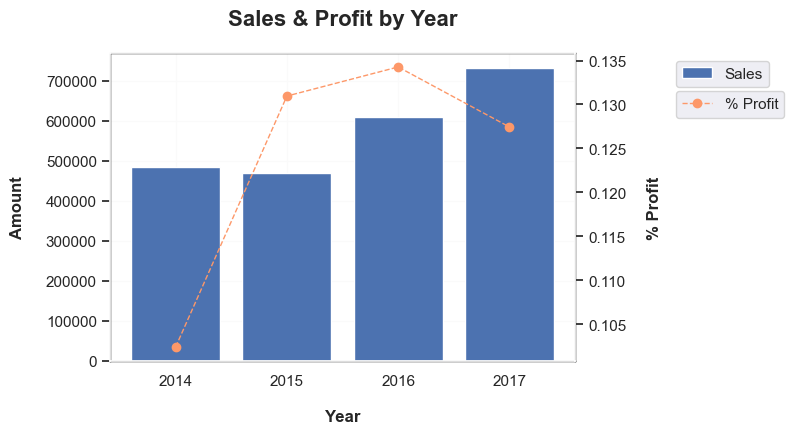

In [15]:
fig, ax1 = plt.subplots(figsize=(6,4))
ax1.set_facecolor('white')

ax1.bar(df_trans_year['Order Year'], df_trans_year['Sales'], label = 'Sales')

ax1.set_title('Sales & Profit by Year', fontweight = 'bold', fontsize = 16, pad = 20)
ax1.set_xlabel('Year', fontweight = 'bold', labelpad = 15)
ax1.set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
ax1.legend( bbox_to_anchor=(1.2, 1), loc='upper left')
ax1.grid(True, color = '#fafafa')

ax2 = ax1.twinx()
ax2.plot(df_trans_year['Order Year'], df_trans_year['% Profit'], marker = 'o', linestyle = '--', label = '% Profit', color = cm.magma(200), linewidth = 1)
ax2.set_ylabel('% Profit', fontweight = 'bold', labelpad = 15)
ax2.legend( bbox_to_anchor=(1.2, 0.9), loc='upper left')
ax2.grid(False)

for spine in ax1.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1) 

plt.show()

In [16]:
df_trans_monthyear = df_trans.groupby(['Order MonthYear'])[['Sales', 'Profit']].sum().reset_index()
df_trans_monthyear['% Profit'] = df_trans_monthyear['Profit'] / df_trans_monthyear['Sales']
df_trans_monthyear['Order MonthYear'] = df_trans_monthyear['Order MonthYear'].astype(str)
df_trans_monthyear.head(3)

,Order MonthYear,Sales,Profit,% Profit
0,14-01,14236.895,2450.1907,0.172101
1,14-02,4519.892,862.3084,0.190781
2,14-03,55691.009,498.7299,0.008955


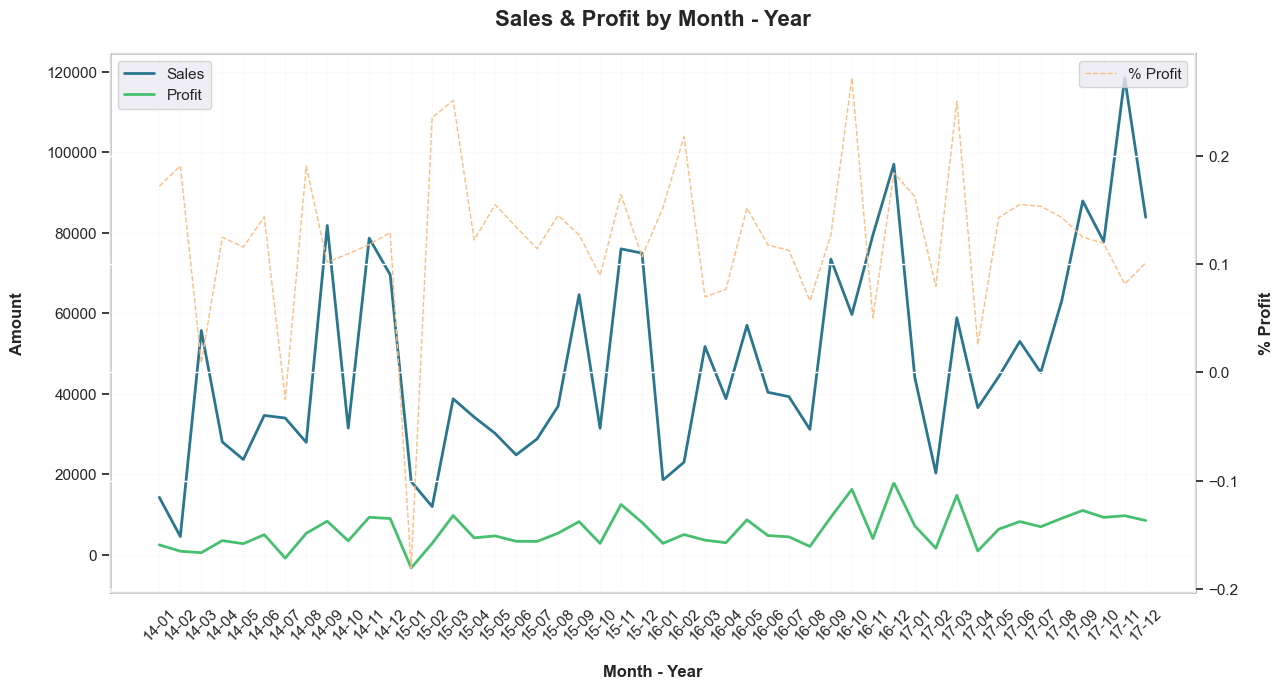

In [17]:
fig, ax1 = plt.subplots(figsize=(14,7))
ax1.set_facecolor('white')

ax1.plot(df_trans_monthyear['Order MonthYear'], df_trans_monthyear['Sales'], linestyle = '-', label = 'Sales', color = cm.viridis(100), linewidth = 2)
ax1.plot(df_trans_monthyear['Order MonthYear'], df_trans_monthyear['Profit'], linestyle = '-', label = 'Profit', color = cm.viridis(180), linewidth = 2)

ax1.set_title('Sales & Profit by Month - Year', fontweight='bold', fontsize = 16, pad = 20)
ax1.set_xlabel('Month - Year', fontweight='bold', labelpad = 15)
ax1.set_ylabel('Amount', fontweight='bold', labelpad = 15)
ax1.legend(loc = 'upper left')
ax1.grid(True, color = '#fafafa')
plt.xticks(rotation = 45)

ax2 = ax1.twinx()
ax2.plot(df_trans_monthyear['Order MonthYear'], df_trans_monthyear['% Profit'], linestyle = '--', label = '% Profit', color = cm.magma(220), linewidth = 1)
ax2.set_ylabel('% Profit', fontweight = 'bold', labelpad = 15)
ax2.legend(loc='upper right')

for spine in ax1.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1) 

plt.show()

In [18]:
df_trans_month_year = df_trans.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']].sum().reset_index()
df_trans_month_year['% Profit'] = df_trans_month_year['Profit'] / df_trans_month_year['Sales']
df_trans_month_year.head(3)

,Order Year,Order Month,Sales,Profit,% Profit
0,2014,1,14236.895,2450.1907,0.172101
1,2014,2,4519.892,862.3084,0.190781
2,2014,3,55691.009,498.7299,0.008955


C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\3692242217.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_year.loc[:,'Order Month'] = df_year['Order Month'].astype(str)
C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\3692242217.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_year.loc[:,'Order Month'] = df_year['Order Month'].astype(str)
C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\3692242217.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '2' '3' '4' '5' '6'

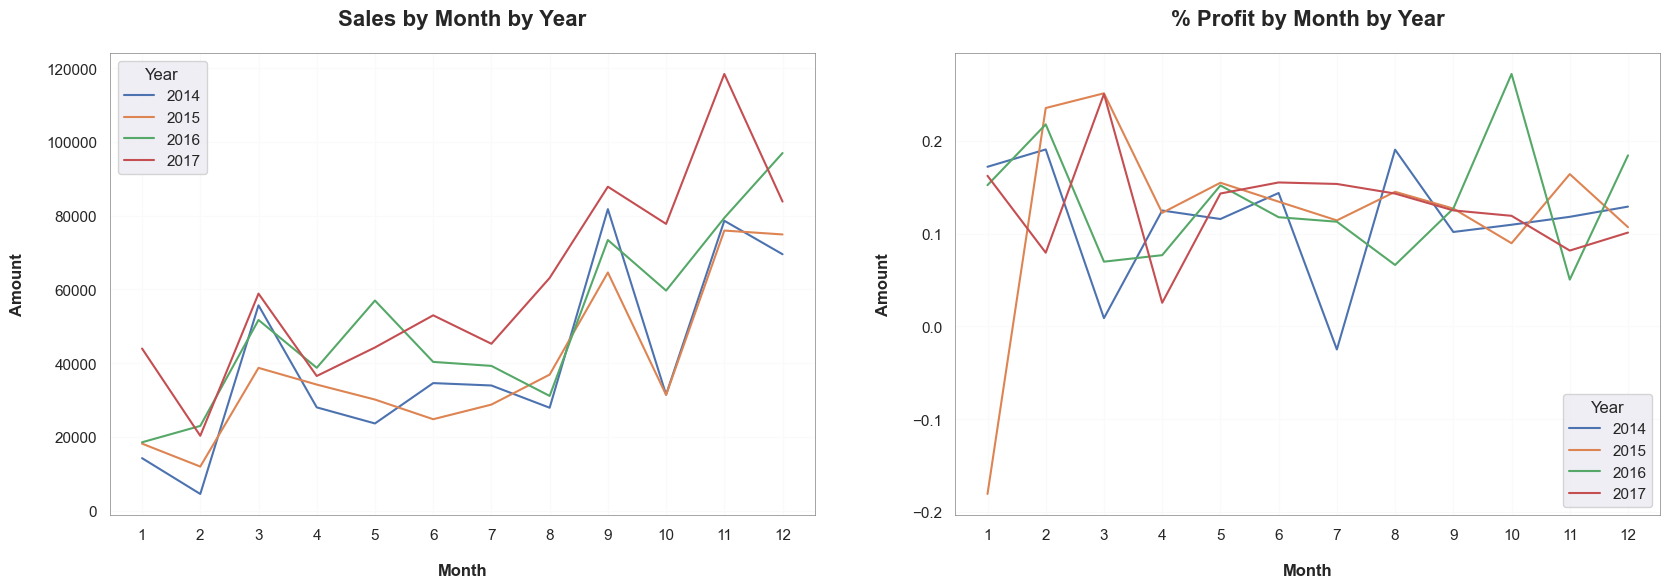

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

num_years = len(df_trans_month_year['Order Year'].unique())

# Sales chart
for year in df_trans_month_year['Order Year'].unique():
    df_year = df_trans_month_year[df_trans_month_year['Order Year'] == year]
    df_year.loc[:,'Order Month'] = df_year['Order Month'].astype(str)
    axs[0].plot(df_year['Order Month'], df_year['Sales'], label = year)

axs[0].set_title('Sales by Month by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('Month', fontweight = 'bold', labelpad = 15)
axs[0].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[0].legend(title = 'Year')
axs[0].grid(True, color = '#fafafa')
axs[0].set_facecolor('white')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# % Profit chart
for year in df_trans_month_year['Order Year'].unique():
    df_year = df_trans_month_year[df_trans_month_year['Order Year'] == year]
    df_year.loc[:,'Order Month'] = df_year['Order Month'].astype(str)
    axs[1].plot(df_year['Order Month'], df_year['% Profit'], label = year)

axs[1].set_title('% Profit by Month by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('Month', fontweight = 'bold', labelpad = 15)
axs[1].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[1].legend(title = 'Year')
axs[1].grid(True, color = '#fafafa')
axs[1].set_facecolor('white')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

In [20]:
df_trans_dow_year = df_trans.groupby(['Order Year', 'Order DOW'])[['Sales', 'Profit']].sum().reset_index()
df_trans_dow_year['% Profit'] = df_trans_month_year['Profit'] / df_trans_month_year['Sales']

dow_sort_dict = {'Order DOW': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                 'DOW Sorting': [1, 2, 3, 4, 5, 6, 7]}
df_dim_dow = pd.DataFrame(dow_sort_dict)
df_dim_dow


df_trans_dow_year = pd.merge(df_trans_dow_year, df_dim_dow, on = 'Order DOW', how = 'left')
df_trans_dow_year = df_trans_dow_year.sort_values(by = ['Order Year', 'DOW Sorting'])

df_trans_dow_year.head(3)

,Order Year,Order DOW,Sales,Profit,% Profit,DOW Sorting
1,2014,Monday,46721.0152,9835.9682,0.190781,1
5,2014,Tuesday,6096.4808,1128.6970,0.143850,2
6,2014,Wednesday,84607.3656,6117.4360,-0.024789,3


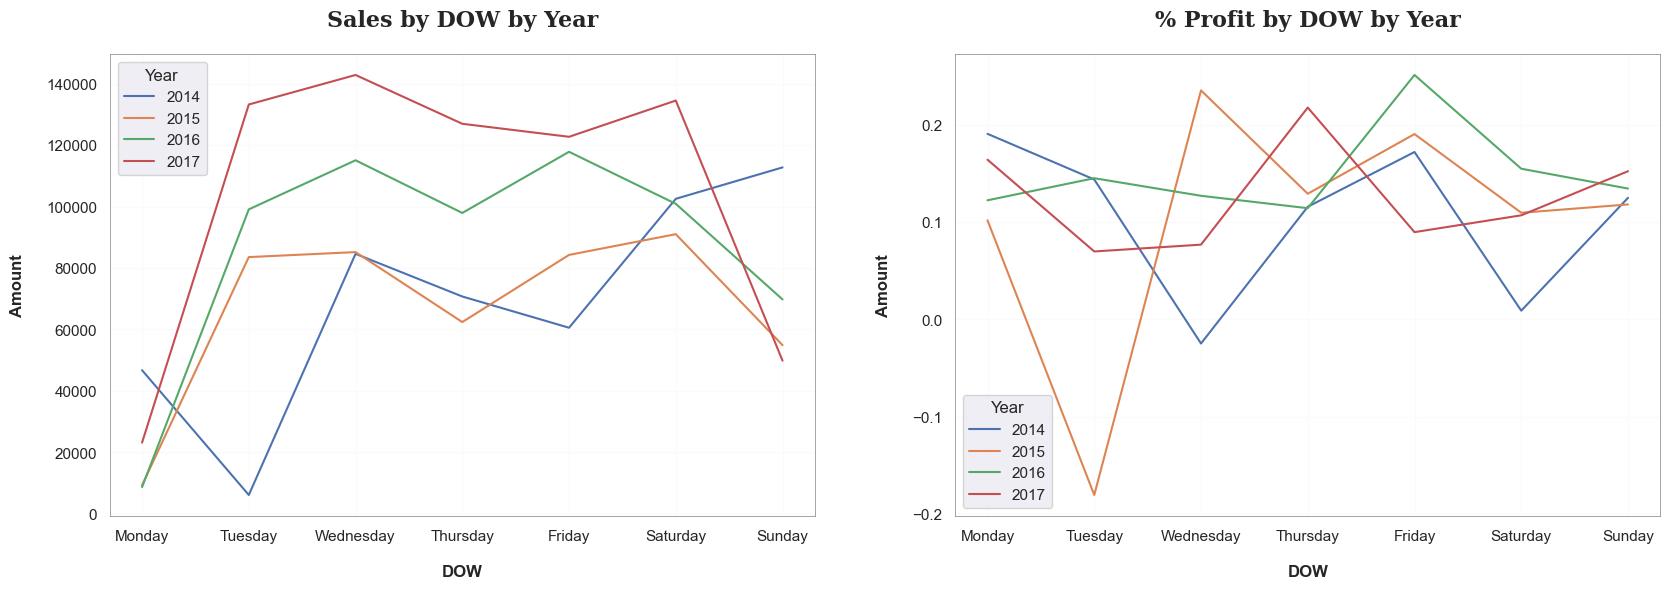

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

num_years = len(df_trans_dow_year['Order Year'].unique())

# Sales chart
for year in df_trans_dow_year['Order Year'].unique():
    df_year = df_trans_dow_year[df_trans_dow_year['Order Year'] == year]
    axs[0].plot(df_year['Order DOW'], df_year['Sales'], label = year)

axs[0].set_title('Sales by DOW by Year', fontname='serif', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('DOW', fontweight = 'bold', labelpad = 15)
axs[0].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[0].legend(title = 'Year')
axs[0].grid(True, color = '#fafafa')
axs[0].set_facecolor('white')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# % Profit chart
for year in df_trans_dow_year['Order Year'].unique():
    df_year = df_trans_dow_year[df_trans_dow_year['Order Year'] == year]
    axs[1].plot(df_year['Order DOW'], df_year['% Profit'], label = year)

axs[1].set_title('% Profit by DOW by Year', fontname='serif', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('DOW', fontweight = 'bold', labelpad = 15)
axs[1].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[1].legend(title = 'Year')
axs[1].grid(True, color = '#fafafa')
axs[1].set_facecolor('white')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

## 3. Customer Data Exploration

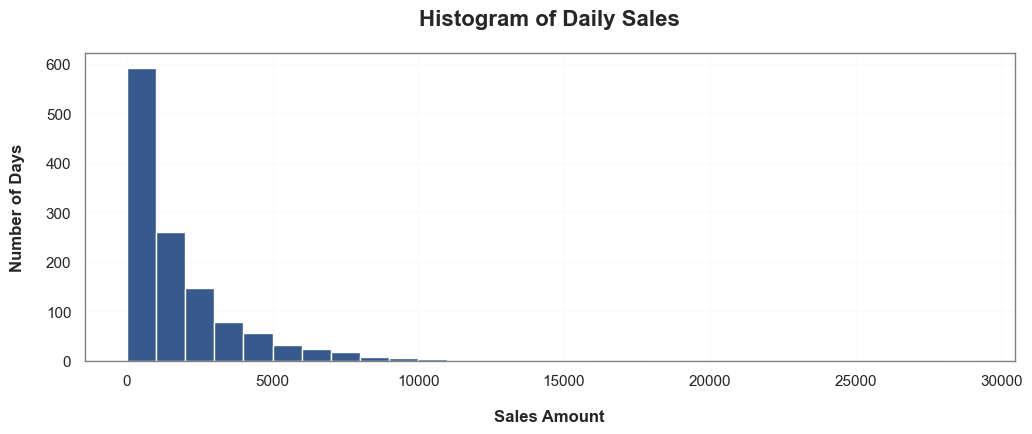

In [22]:
df_trans_year_date = df_trans.groupby(['Order Year','Order Date'])[['Sales', 'Profit']].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,4))
ax.set_facecolor('white')

bin_width = 1000
min_edge = df_trans_year_date['Sales'].min()
max_edge = df_trans_year_date['Sales'].max() + bin_width
bin_edges = np.arange(min_edge, max_edge, bin_width)

plt.hist(df_trans_year_date['Sales'], bins = bin_edges, edgecolor = 'white', alpha = 1, color = cm.viridis(70))
plt.title('Histogram of Daily Sales', fontweight = 'bold', fontsize=16, pad = 20)
plt.xlabel('Sales Amount', fontweight = 'bold', labelpad = 15)
plt.ylabel('Number of Days', fontweight = 'bold', labelpad = 15)
plt.grid(True, color = '#fafafa')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(1)

plt.show()

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\1411713164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_date, palette = 'Set2', ax=ax)


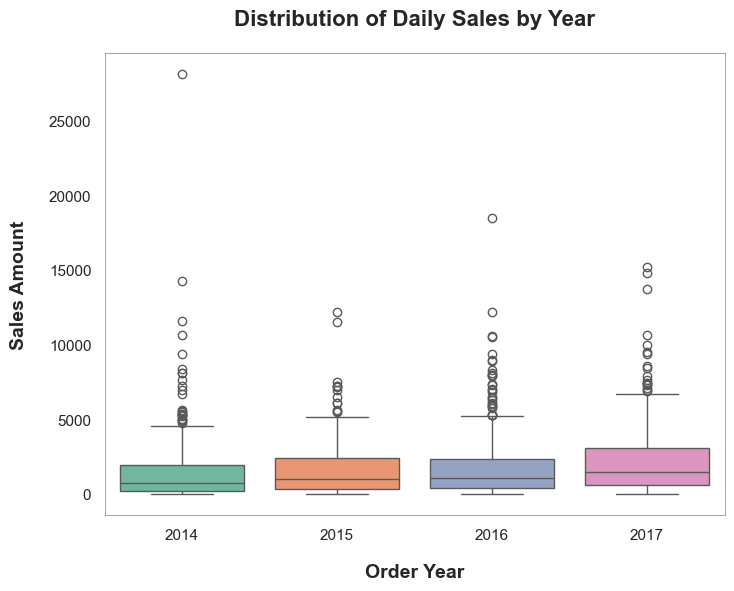

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_date, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Daily Sales by Year', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Order Year', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Sales Amount', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\3603335510.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_date_90, palette = 'Set2', ax=ax)


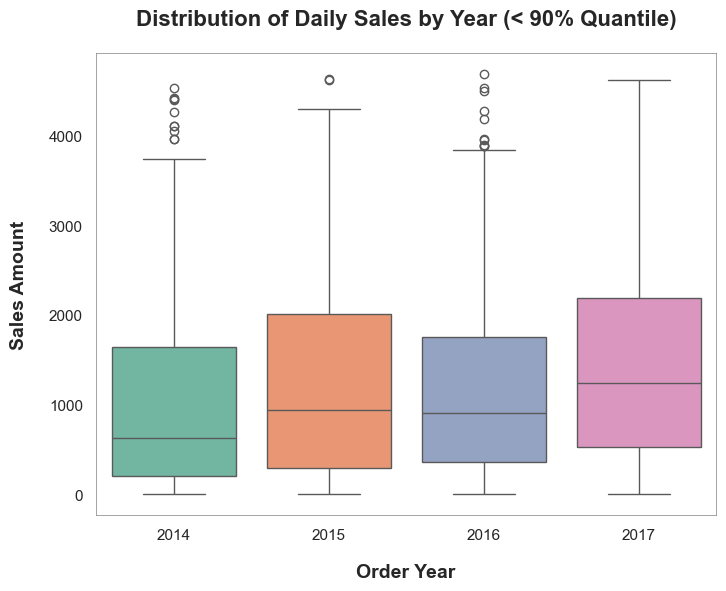

In [24]:
sales_90th_percentile = df_trans_year_date['Sales'].quantile(0.90)
df_trans_year_date_90 = df_trans_year_date[df_trans_year_date['Sales'] <= sales_90th_percentile]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_date_90, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Daily Sales by Year (< 90% Quantile)', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Order Year', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Sales Amount', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

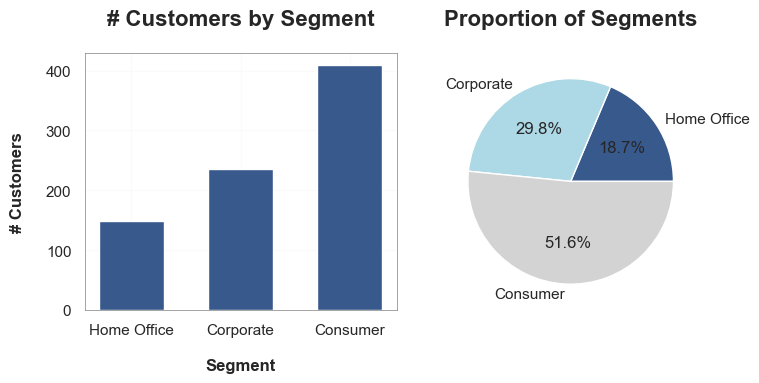

In [25]:
segment_counts = df_trans.groupby(['Segment'])['Customer ID'].nunique().reset_index()
segment_counts.columns = ['Segment', '# Customers']
segment_counts = segment_counts.sort_values(by = '# Customers')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.set_facecolor('white')

# Bar chart
ax1.bar(segment_counts['Segment'], segment_counts['# Customers'], color = cm.viridis(70), width = 0.6)
ax1.set_title('# Customers by Segment', fontweight = 'bold', fontsize = 16, pad = 20)
ax1.set_xlabel('Segment', fontweight = 'bold', labelpad = 15)
ax1.set_ylabel('# Customers', fontweight = 'bold', labelpad = 15)
ax1.grid(True, color = '#fafafa')

for spine in ax1.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# Pie Chart
colors = [cm.viridis(70), 'lightblue', 'lightgrey']

ax2.pie(segment_counts['# Customers'], labels = segment_counts['Segment'], autopct='%1.1f%%', colors = colors)
ax2.set_title('Proportion of Segments', fontweight = 'bold', fontsize = 16, pad = 20)

plt.tight_layout()
plt.show()

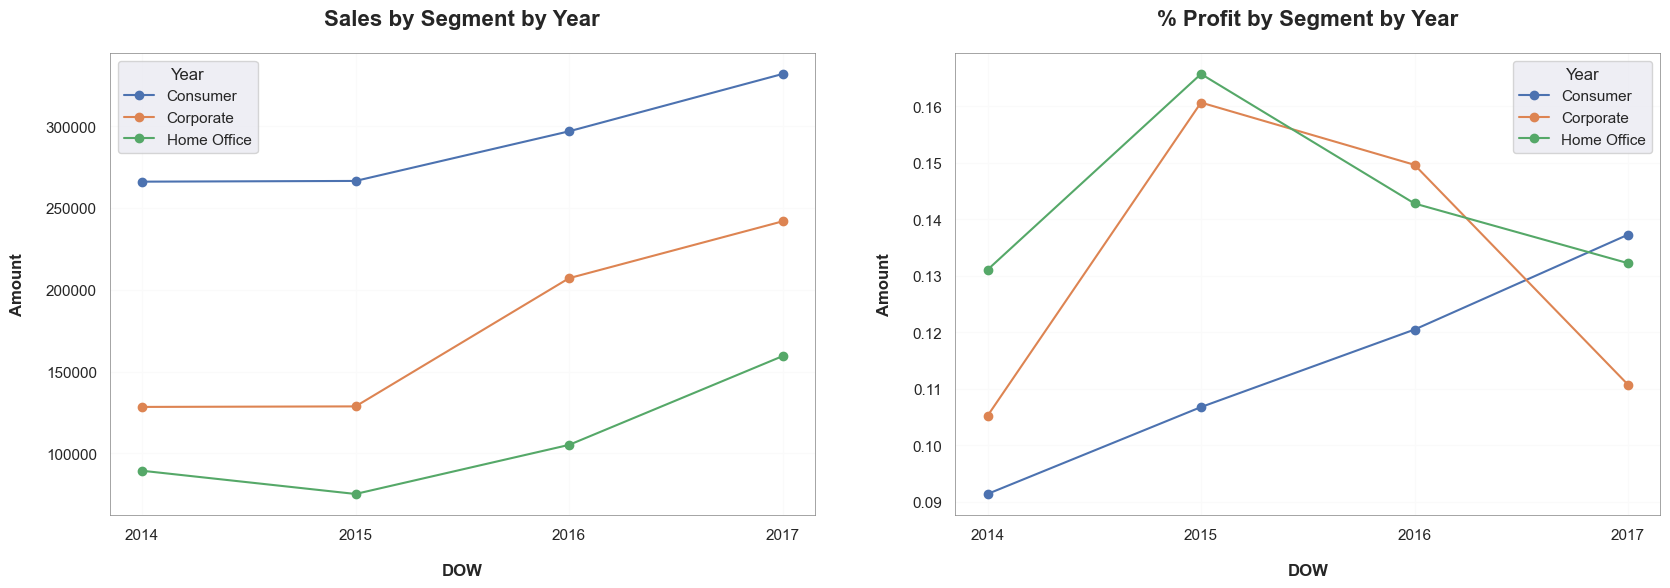

In [26]:
df_trans_segment_year = df_trans.groupby(['Order Year', 'Segment'])[['Sales', 'Profit']].sum().reset_index()
df_trans_segment_year['% Profit'] = df_trans_segment_year['Profit'] / df_trans_segment_year['Sales']
df_trans_segment_year['Order Year'] = df_trans_segment_year['Order Year'].astype(str)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Sales chart
for segment in df_trans_segment_year['Segment'].unique():
    df_segment = df_trans_segment_year[df_trans_segment_year['Segment'] == segment]
    axs[0].plot(df_segment['Order Year'], df_segment['Sales'], label = segment, marker = 'o')

axs[0].set_title('Sales by Segment by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('DOW', fontweight = 'bold', labelpad = 15)
axs[0].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[0].legend(title = 'Year')
axs[0].grid(True, color = '#fafafa')
axs[0].set_facecolor('white')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# % Profit chart
for segment in df_trans_segment_year['Segment'].unique():
    df_segment = df_trans_segment_year[df_trans_segment_year['Segment'] == segment]
    axs[1].plot(df_segment['Order Year'], df_segment['% Profit'], label = segment, marker = 'o')

axs[1].set_title('% Profit by Segment by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('DOW', fontweight = 'bold', labelpad = 15)
axs[1].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[1].legend(title = 'Year')
axs[1].grid(True, color = '#fafafa')
axs[1].set_facecolor('white')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

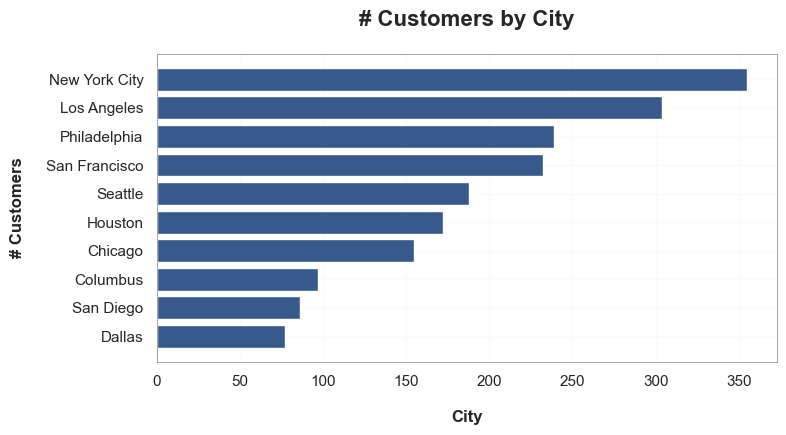

In [27]:
city_counts = df_trans.groupby(['City'])['Customer ID'].nunique().reset_index()
city_counts.columns = ['City', '# Customers']
city_counts = city_counts.sort_values(by = '# Customers')

top_cities_customers = city_counts.sort_values(by='# Customers', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4), facecolor='white')
ax.set_facecolor('white')

plt.barh(top_cities_customers['City'], top_cities_customers['# Customers'], color = cm.viridis(70))
plt.title('# Customers by City', fontweight = 'bold', fontsize = 16, pad = 20)
plt.xlabel('City', fontweight = 'bold', labelpad = 15)
plt.ylabel('# Customers', fontweight = 'bold', labelpad = 15)
plt.gca().invert_yaxis()
plt.grid(True, color = '#fafafa')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

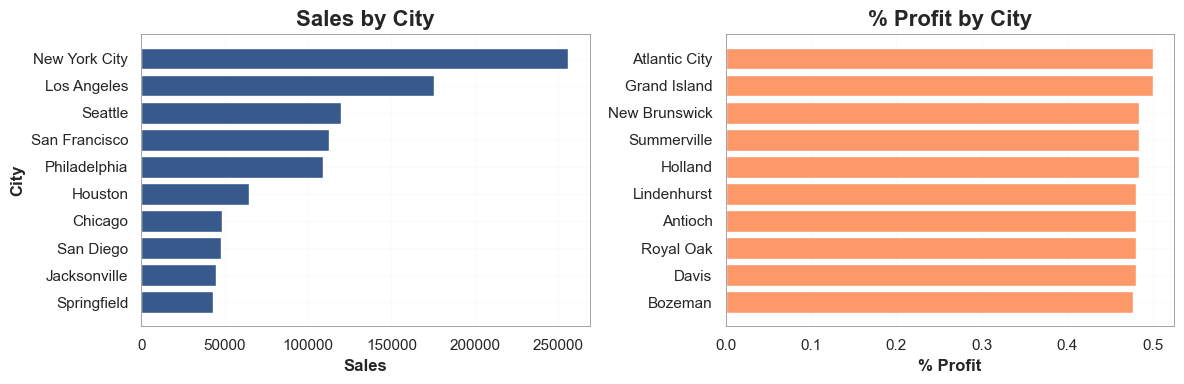

In [28]:
city_sales_profit = df_trans.groupby(['City'])[['Sales', 'Profit']].sum().reset_index()
city_sales_profit.columns = ['City', 'Sales', 'Profit']
city_sales_profit['% Profit'] = city_sales_profit['Profit'] / city_sales_profit['Sales']

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Sales plot
top_cities_sales = city_sales_profit.sort_values(by='Sales', ascending=False).head(10)

axs[0].barh(top_cities_sales['City'], top_cities_sales['Sales'], color = cm.viridis(70))
axs[0].set_title('Sales by City', fontweight = 'bold', fontsize = 16)
axs[0].set_xlabel('Sales', fontweight = 'bold')
axs[0].set_ylabel('City', fontweight = 'bold')
axs[0].set_facecolor('white')
axs[0].invert_yaxis()
axs[0].grid(True, color = '#fafafa')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# Profit plot
top_cities_profit = city_sales_profit.sort_values(by='% Profit', ascending=False).head(10)

axs[1].barh(top_cities_profit['City'], top_cities_profit['% Profit'], color = cm.magma(200))
axs[1].set_title('% Profit by City', fontweight = 'bold', fontsize = 16)
axs[1].set_xlabel('% Profit', fontweight = 'bold')
axs[1].set_facecolor('white')
axs[1].invert_yaxis()
axs[1].grid(True, color = '#fafafa')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.tight_layout()
plt.show()

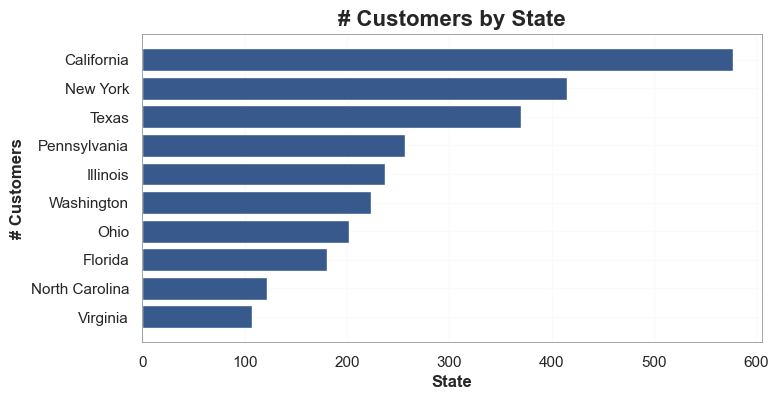

In [29]:
state_counts = df_trans.groupby(['State'])['Customer ID'].nunique().reset_index()
state_counts.columns = ['State', '# Customers']
state_counts = state_counts.sort_values(by = '# Customers')

top_states_customers = state_counts.sort_values(by='# Customers', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,4), facecolor='white')
ax.set_facecolor('white')

plt.barh(top_states_customers['State'], top_states_customers['# Customers'], color = cm.viridis(70))
plt.title('# Customers by State', fontweight = 'bold', fontsize = 16)
plt.xlabel('State', fontweight = 'bold')
plt.ylabel('# Customers', fontweight = 'bold')
plt.gca().invert_yaxis()
plt.grid(True, color = '#fafafa')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

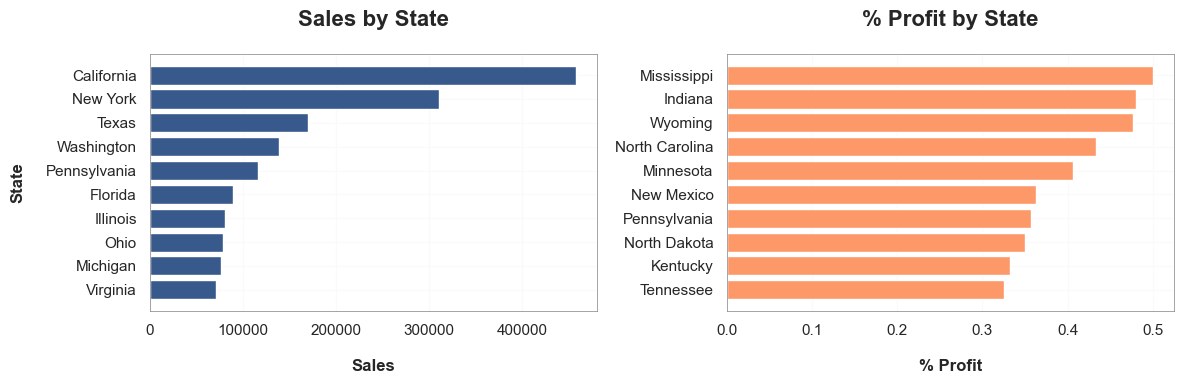

In [30]:
state_sales_profit = df_trans.groupby(['State'])[['Sales', 'Profit']].sum().reset_index()
state_sales_profit.columns = ['State', 'Sales', 'Profit']
state_sales_profit['% Profit'] = city_sales_profit['Profit'] / city_sales_profit['Sales']

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Sales plot
top_states_sales = state_sales_profit.sort_values(by='Sales', ascending=False).head(10)

axs[0].barh(top_states_sales['State'], top_states_sales['Sales'], color = cm.viridis(70))
axs[0].set_title('Sales by State', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('Sales', fontweight = 'bold', labelpad = 15)
axs[0].set_ylabel('State', fontweight = 'bold', labelpad = 15)
axs[0].set_facecolor('white')
axs[0].invert_yaxis()
axs[0].grid(True, color = '#fafafa')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# Profit plot
top_states_profit = state_sales_profit.sort_values(by='% Profit', ascending=False).head(10)

axs[1].barh(top_states_profit['State'], top_states_profit['% Profit'], color = cm.magma(200))
axs[1].set_title('% Profit by State', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('% Profit', fontweight = 'bold', labelpad = 15)
axs[1].set_facecolor('white')
axs[1].invert_yaxis()
axs[1].grid(True, color = '#fafafa')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.tight_layout()
plt.show()

## 4. Understand Customer Metrics

### 4.1 Customer Retention (Corhort Analysis)

In [31]:
df_trans_distinct_order = df_trans[['Order ID', 'Order Date', 'Customer ID', 'Order MonthYear', 'Order Month', 'Order Year']].drop_duplicates()
df_trans_distinct_order

,Order ID,Order Date,Customer ID,Order MonthYear,Order Month,Order Year
0,CA-2016-152156,2016-11-08,CG-12520,16-11,11,2016
2,CA-2016-138688,2016-06-12,DV-13045,16-06,6,2016
3,US-2015-108966,2015-10-11,SO-20335,15-10,10,2015
5,CA-2014-115812,2014-06-09,BH-11710,14-06,6,2014
12,CA-2017-114412,2017-04-15,AA-10480,17-04,4,2017
...,...,...,...,...,...,...
9985,CA-2016-125794,2016-09-29,ML-17410,16-09,9,2016
9986,CA-2017-163629,2017-11-17,RA-19885,17-11,11,2017
9988,CA-2014-110422,2014-01-21,TB-21400,14-01,1,2014
9989,CA-2017-121258,2017-02-26,DB-13060,17-02,2,2017


In [32]:
df_dim_customer_first_monthyear = df_trans_distinct_order.groupby('Customer ID')['Order MonthYear'].min().reset_index()
df_dim_customer_first_monthyear.rename(columns={'Order MonthYear': 'First MonthYear'}, inplace=True)
df_dim_customer_first_monthyear.head(3)

,Customer ID,First MonthYear
0,AA-10315,14-03
1,AA-10375,14-04
2,AA-10480,14-05


In [33]:
df_trans_compare_monthyear = pd.merge(df_trans_distinct_order, df_dim_customer_first_monthyear, on = 'Customer ID', how = 'left')
df_trans_compare_monthyear['User Classification'] = df_trans_compare_monthyear.apply(
    lambda row: 'New' if row['Order MonthYear'] == row['First MonthYear'] else 'Repeated', axis=1
)
df_trans_compare_monthyear

,Order ID,Order Date,Customer ID,Order MonthYear,Order Month,Order Year,First MonthYear,User Classification
0,CA-2016-152156,2016-11-08,CG-12520,16-11,11,2016,15-10,Repeated
1,CA-2016-138688,2016-06-12,DV-13045,16-06,6,2016,16-06,New
2,US-2015-108966,2015-10-11,SO-20335,15-10,10,2015,15-10,New
3,CA-2014-115812,2014-06-09,BH-11710,14-06,6,2014,14-06,New
4,CA-2017-114412,2017-04-15,AA-10480,17-04,4,2017,14-05,Repeated
...,...,...,...,...,...,...,...,...
5004,CA-2016-125794,2016-09-29,ML-17410,16-09,9,2016,14-11,Repeated
5005,CA-2017-163629,2017-11-17,RA-19885,17-11,11,2017,14-04,Repeated
5006,CA-2014-110422,2014-01-21,TB-21400,14-01,1,2014,14-01,New
5007,CA-2017-121258,2017-02-26,DB-13060,17-02,2,2017,14-03,Repeated


In [34]:
df_new_counts = df_trans_compare_monthyear[df_trans_compare_monthyear['User Classification']=='New'].groupby(['Order Year', 'Order Month', 'User Classification'])['Customer ID'].nunique().reset_index()
df_repeated_counts = df_trans_compare_monthyear[df_trans_compare_monthyear['User Classification']=='Repeated'].groupby(['Order Year', 'Order Month', 'User Classification'])['Customer ID'].nunique().reset_index()

df_new_counts.rename(columns = {'Customer ID': '# Customer'}, inplace = True)
df_repeated_counts.rename(columns = {'Customer ID': '# Customer'}, inplace = True)

df_new_counts.head(5)

,Order Year,Order Month,User Classification,# Customer
0,2014,1,New,32
1,2014,2,New,24
2,2014,3,New,65
3,2014,4,New,56
4,2014,5,New,56


In [35]:
df_repeated_counts.head(5)

,Order Year,Order Month,User Classification,# Customer
0,2014,2,Repeated,3
1,2014,3,Repeated,4
2,2014,4,Repeated,8
3,2014,5,Repeated,11
4,2014,6,Repeated,15


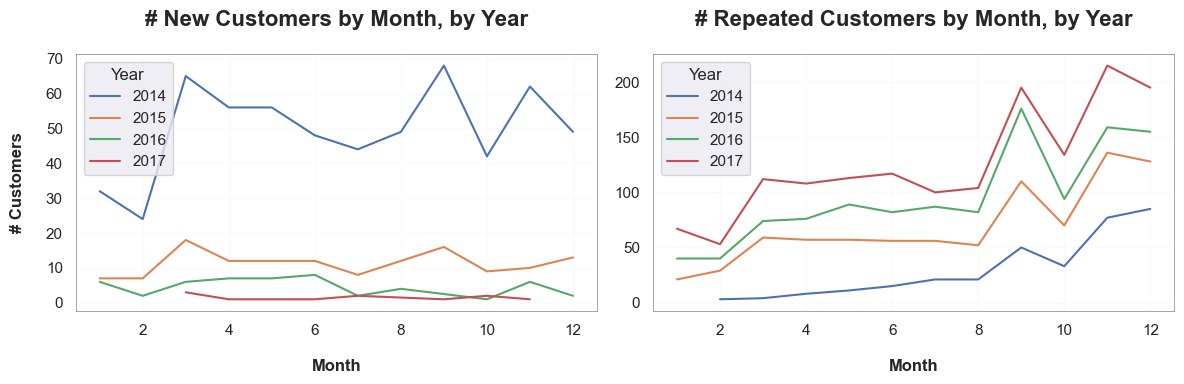

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# New customers plot

for year in df_new_counts['Order Year'].unique():
    df_new_counts_year = df_new_counts[df_new_counts['Order Year'] == year]
    axs[0].plot(df_new_counts_year['Order Month'], df_new_counts_year['# Customer'], label = year)

axs[0].set_title('# New Customers by Month, by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('Month', fontweight = 'bold', labelpad = 15)
axs[0].set_ylabel('# Customers', fontweight = 'bold', labelpad = 15)
axs[0].set_facecolor('white')
axs[0].legend(title = 'Year')
axs[0].grid(True, color = '#fafafa')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# Repeated customers plot

for year in df_repeated_counts['Order Year'].unique():
    df_repeated_counts_year = df_repeated_counts[df_repeated_counts['Order Year'] == year]
    axs[1].plot(df_repeated_counts_year['Order Month'],df_repeated_counts_year['# Customer'], label = year)

axs[1].set_title('# Repeated Customers by Month, by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('Month', fontweight = 'bold', labelpad = 15)
axs[1].set_facecolor('white')
axs[1].legend(title = 'Year')
axs[1].grid(True, color = '#fafafa')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.tight_layout()
plt.show()


In [37]:
df_trans_for_cohort = df_trans[['Customer ID', 'Order Date']].drop_duplicates()
df_trans_for_cohort['Order MonthYear'] = df_trans_for_cohort['Order Date'].dt.to_period('M').dt.to_timestamp()
df_trans_for_cohort.head(5)

,Customer ID,Order Date,Order MonthYear
0,CG-12520,2016-11-08,2016-11-01
2,DV-13045,2016-06-12,2016-06-01
3,SO-20335,2015-10-11,2015-10-01
5,BH-11710,2014-06-09,2014-06-01
12,AA-10480,2017-04-15,2017-04-01


In [38]:
df_trans_for_cohort['Cohort MonthYear'] = df_trans_for_cohort.groupby('Customer ID')['Order MonthYear'].transform('min')

def cohort_index(df, col1, col2):
  order_year = pd.to_datetime(df[col1]).dt.year
  order_month = pd.to_datetime(df[col1]).dt.month
  cohort_year = pd.to_datetime(df[col2]).dt.year
  cohort_month = pd.to_datetime(df[col2]).dt.month
  return (order_year - cohort_year) * 12 + order_month - cohort_month

df_trans_for_cohort['Cohort Index'] = cohort_index(df_trans_for_cohort, 'Order MonthYear', 'Cohort MonthYear')

df_trans_for_cohort.head(5)

,Customer ID,Order Date,Order MonthYear,Cohort MonthYear,Cohort Index
0,CG-12520,2016-11-08,2016-11-01,2015-10-01,13
2,DV-13045,2016-06-12,2016-06-01,2016-06-01,0
3,SO-20335,2015-10-11,2015-10-01,2015-10-01,0
5,BH-11710,2014-06-09,2014-06-01,2014-06-01,0
12,AA-10480,2017-04-15,2017-04-01,2014-05-01,35


[Text(0, 0.5, '2014-01-01'),
 Text(0, 2.5, '2014-03-01'),
 Text(0, 4.5, '2014-05-01'),
 Text(0, 6.5, '2014-07-01'),
 Text(0, 8.5, '2014-09-01'),
 Text(0, 10.5, '2014-11-01'),
 Text(0, 12.5, '2015-01-01'),
 Text(0, 14.5, '2015-03-01'),
 Text(0, 16.5, '2015-05-01'),
 Text(0, 18.5, '2015-07-01'),
 Text(0, 20.5, '2015-09-01'),
 Text(0, 22.5, '2015-11-01'),
 Text(0, 24.5, '2016-01-01'),
 Text(0, 26.5, '2016-03-01'),
 Text(0, 28.5, '2016-05-01'),
 Text(0, 30.5, '2016-07-01'),
 Text(0, 32.5, '2016-10-01'),
 Text(0, 34.5, '2016-12-01'),
 Text(0, 36.5, '2017-04-01'),
 Text(0, 38.5, '2017-07-01'),
 Text(0, 40.5, '2017-10-01')]

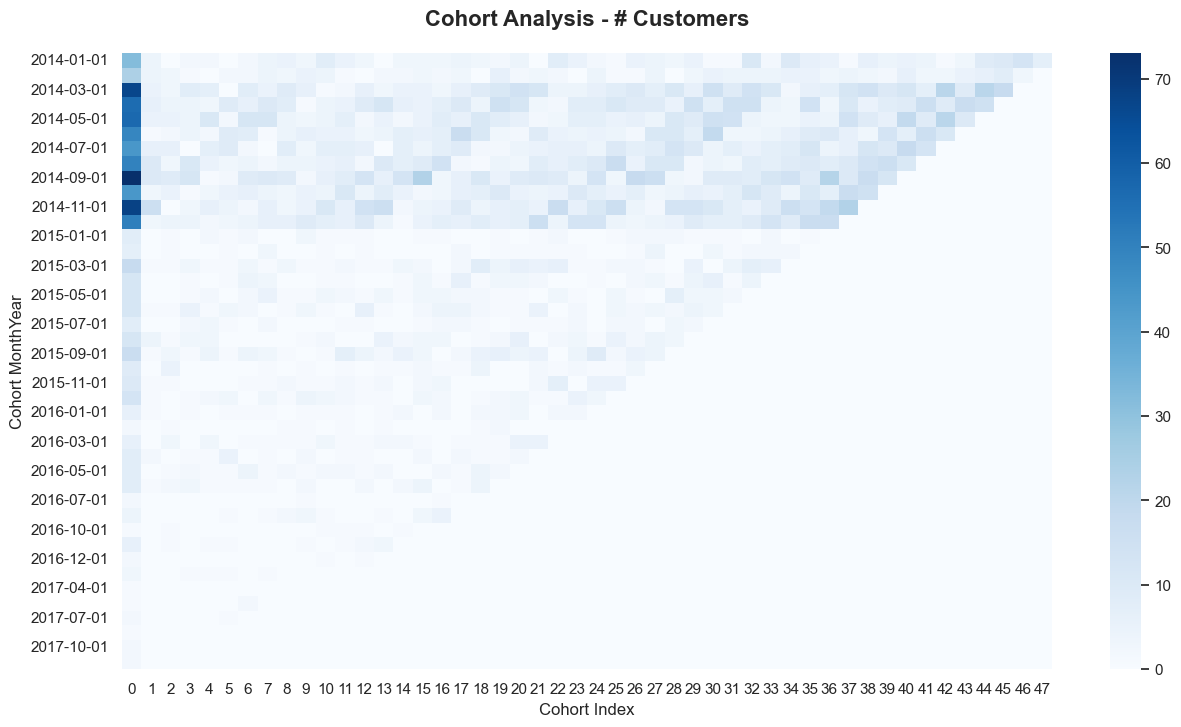

In [39]:
cohort_counts = df_trans_for_cohort.pivot_table(index='Cohort MonthYear', columns='Cohort Index', values='Customer ID', aggfunc='count')
cohort_counts.fillna(0, inplace=True)

plt.figure(figsize=(15, 8))
ax = sns.heatmap(cohort_counts, annot=False, fmt='.0%', cmap='Blues')
ax.set_title('Cohort Analysis - # Customers', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_yticklabels([label.get_text().split('T')[0] for label in ax.get_yticklabels()])

[Text(0, 0.5, '2014-01-01'),
 Text(0, 2.5, '2014-03-01'),
 Text(0, 4.5, '2014-05-01'),
 Text(0, 6.5, '2014-07-01'),
 Text(0, 8.5, '2014-09-01'),
 Text(0, 10.5, '2014-11-01'),
 Text(0, 12.5, '2015-01-01'),
 Text(0, 14.5, '2015-03-01'),
 Text(0, 16.5, '2015-05-01'),
 Text(0, 18.5, '2015-07-01'),
 Text(0, 20.5, '2015-09-01'),
 Text(0, 22.5, '2015-11-01'),
 Text(0, 24.5, '2016-01-01'),
 Text(0, 26.5, '2016-03-01'),
 Text(0, 28.5, '2016-05-01'),
 Text(0, 30.5, '2016-07-01'),
 Text(0, 32.5, '2016-10-01'),
 Text(0, 34.5, '2016-12-01'),
 Text(0, 36.5, '2017-04-01'),
 Text(0, 38.5, '2017-07-01'),
 Text(0, 40.5, '2017-10-01')]

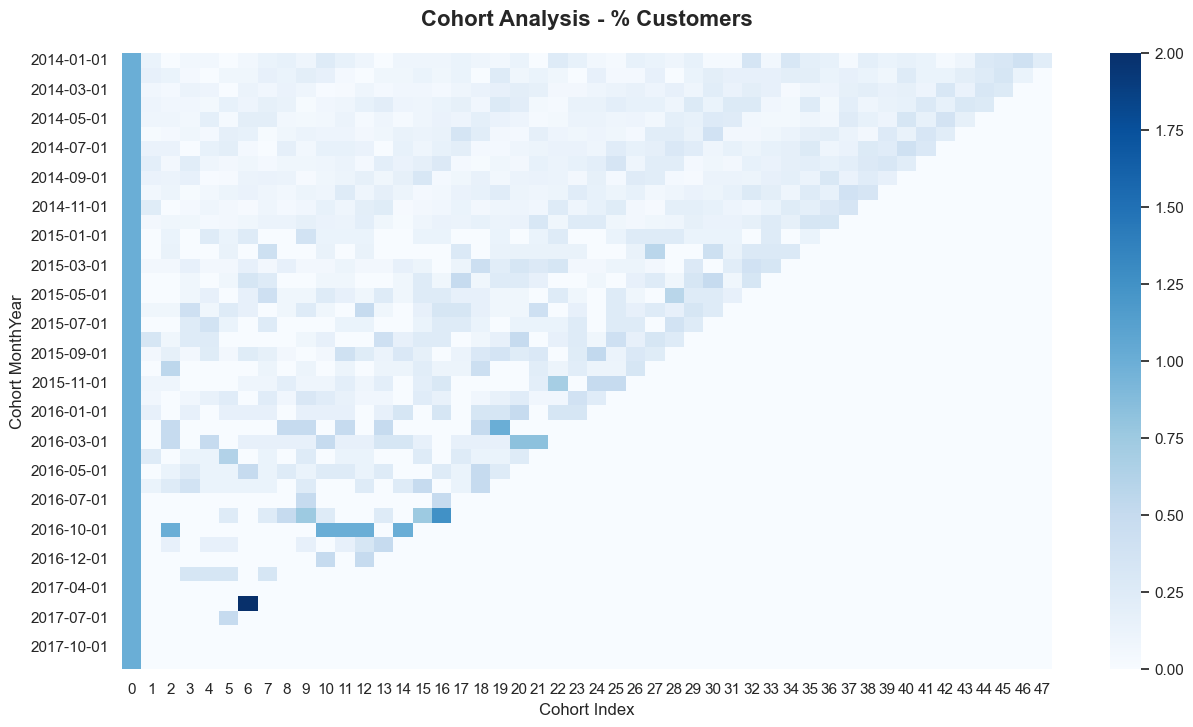

In [40]:
cohort_sizes = cohort_counts.iloc[:, 0]
cohort_retention = cohort_counts.divide(cohort_sizes, axis=0)

plt.figure(figsize=(15, 8))
ax = sns.heatmap(cohort_retention, annot=False, fmt='.0%', cmap='Blues')
ax.set_title('Cohort Analysis - % Customers', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_yticklabels([label.get_text().split('T')[0] for label in ax.get_yticklabels()])

### 4.2 Average Order Value

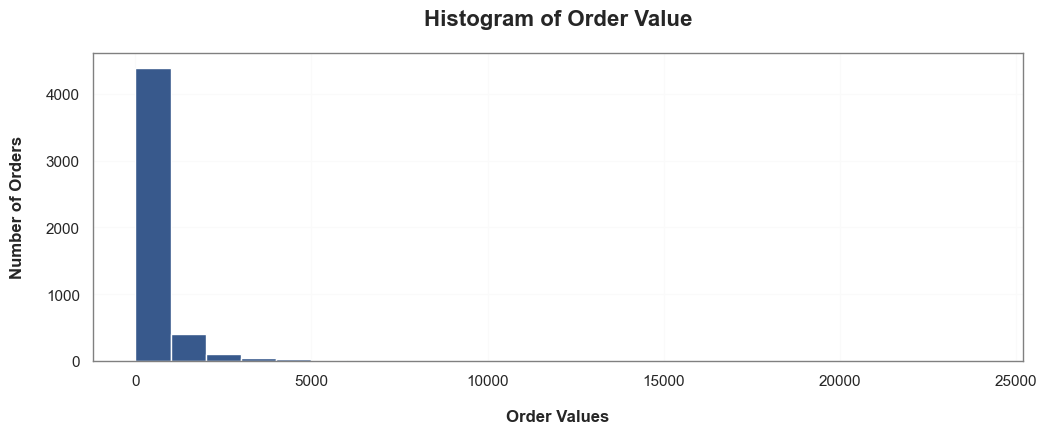

In [41]:
# Order Value Distribution

df_trans_year_order = df_trans.groupby(['Order Year','Order ID'])[['Sales', 'Profit']].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,4))
ax.set_facecolor('white')

bin_width = 1000
min_edge = df_trans_year_order['Sales'].min()
max_edge = df_trans_year_order['Sales'].max() + bin_width
bin_edges = np.arange(min_edge, max_edge, bin_width)

plt.hist(df_trans_year_order['Sales'], bins = bin_edges, edgecolor = 'white', alpha = 1, color = cm.viridis(70))
plt.title('Histogram of Order Value', fontweight = 'bold', fontsize=16, pad = 20)
plt.xlabel('Order Values', fontweight = 'bold', labelpad = 15)
plt.ylabel('Number of Orders', fontweight = 'bold', labelpad = 15)
plt.grid(True, color = '#fafafa')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(1)

plt.show()

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\1854967974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_order, palette = 'Set2', ax=ax)


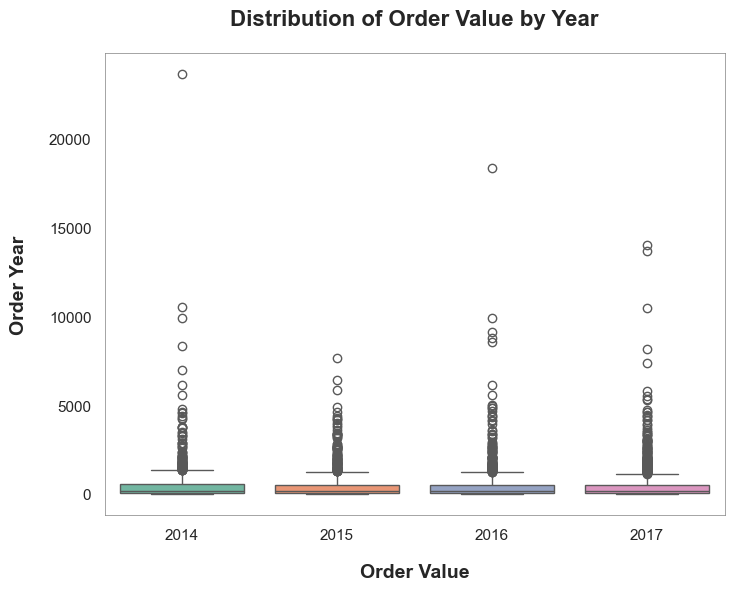

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_order, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Order Value by Year', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Order Value', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Order Year', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\1502328633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_order_80, palette = 'Set2', ax=ax)


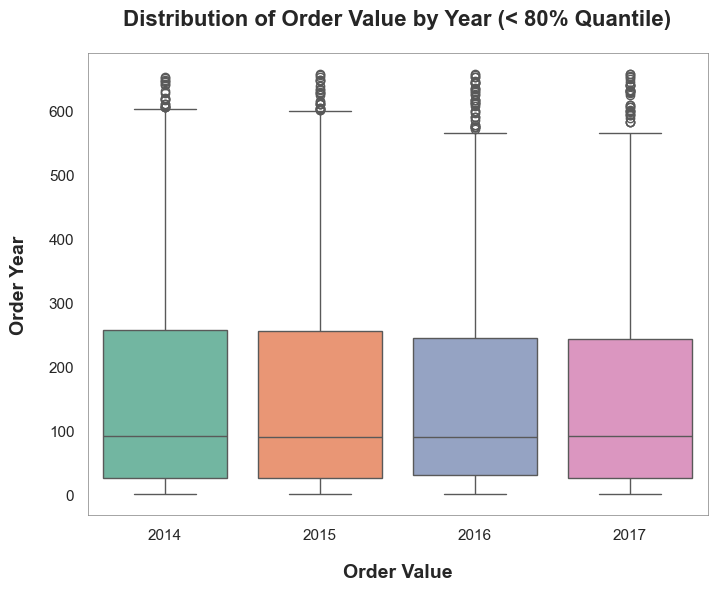

In [43]:
order_value_80th_percentile = df_trans_year_order['Sales'].quantile(0.80)
df_trans_year_order_80 = df_trans_year_order[df_trans_year_order['Sales'] <= order_value_80th_percentile]

fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Order Year', y = 'Sales', data = df_trans_year_order_80, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Order Value by Year (< 80% Quantile)', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Order Value', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Order Year', fontsize = 14, fontweight = 'bold', labelpad = 15)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

In [44]:
# Average Order Value

df_aov_year_classification = pd.merge(df_trans, df_trans_compare_monthyear[['Order ID', 'User Classification']], on = 'Order ID', how = 'left')
df_aov_year_classification = df_aov_year_classification.groupby(['Order ID', 'User Classification', 'Order Year'])['Sales'].sum().reset_index()
df_aov_year_classification = df_aov_year_classification.groupby(['Order Year', 'User Classification'])['Sales'].mean().reset_index()
df_aov_year_classification

,Order Year,User Classification,Sales
0,2014,New,504.419956
1,2014,Repeated,490.774598
2,2015,New,448.220724
3,2015,Repeated,454.093246
4,2016,New,508.062849
5,2016,Repeated,461.393239
6,2017,New,479.767083
7,2017,Repeated,434.303314


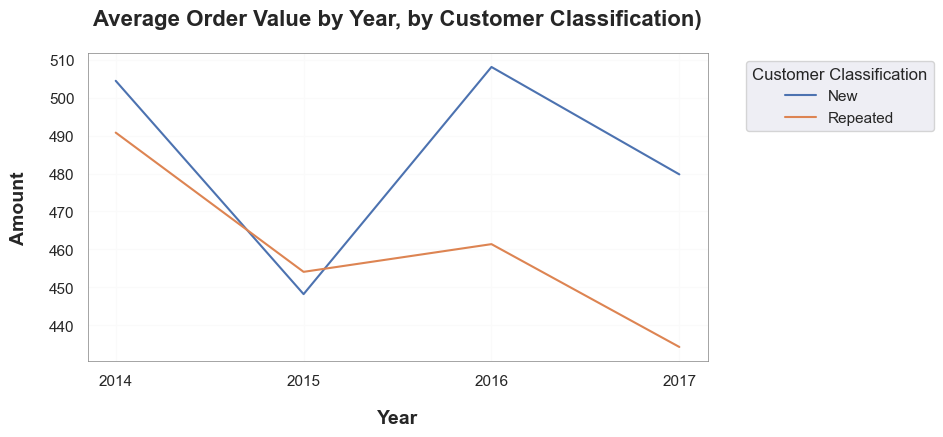

In [45]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_facecolor('white')

for classification in df_aov_year_classification['User Classification'].unique():
    df_classification = df_aov_year_classification[df_aov_year_classification['User Classification'] == classification]
    ax.plot(df_classification['Order Year'].astype(str), df_classification['Sales'], label = classification)

ax.set_title('Average Order Value by Year, by Customer Classification)', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Year', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Amount', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.legend(title = 'Customer Classification',  bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, color = '#fafafa')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

plt.show()

### 4.3 Customer Lifetime Value

In [46]:
# APV - Average Purchase Value
total_revenue = df_trans['Sales'].sum()
number_of_purchase = df_trans['Order ID'].nunique()
APV = total_revenue / number_of_purchase

# APF - Average Purchase Frequency
number_of_unique_customers = df_trans['Customer ID'].nunique()
APF = number_of_purchase / number_of_unique_customers

# ACL Average Customer Lifespan
df_first_date = df_trans.groupby('Customer ID')['Order Date'].agg(['min', 'max']).reset_index()
df_first_date['Life Span'] = (df_first_date['max'] - df_first_date['min']).dt.days / 365.25
ACL = df_first_date['Life Span'].mean()

# CLV - Customer Lifetime Value
CLV = APV * APF * ACL
print("Customer Lifetime Value is ", CLV)

Customer Lifetime Value is  7927.397443408812


In [47]:
df_retained_customer = df_trans[['Customer ID', 'Order ID']].drop_duplicates()
df_retained_customer = df_retained_customer.groupby('Customer ID')['Order ID'].count().reset_index()
df_retained_customer.rename(columns = {'Order ID': 'Order Counts'}, inplace = True)
retained_customer_list = df_retained_customer[df_retained_customer['Order Counts'] > 1]['Customer ID'].drop_duplicates().tolist()

In [48]:
df_trans_retained_customer = df_trans[df_trans['Customer ID'].isin(retained_customer_list)]

# APV - Average Purchase Value
total_revenue_retained_customer = df_trans_retained_customer['Sales'].sum()
number_of_purchase_retained_customer = df_trans_retained_customer['Order ID'].nunique()
APV_retained_customer = total_revenue_retained_customer / number_of_purchase_retained_customer

# APF - Average Purchase Frequency
number_of_unique_customers_retained_customer = df_trans_retained_customer['Customer ID'].nunique()
APF_retained_customer = number_of_purchase_retained_customer / number_of_unique_customers_retained_customer

# ACL Average Customer Lifespan
df_first_date_retained_customer = df_trans_retained_customer.groupby('Customer ID')['Order Date'].agg(['min', 'max']).reset_index()
df_first_date_retained_customer['Life Span'] = (df_first_date_retained_customer['max'] - df_first_date_retained_customer['min']).dt.days / 365.25
ACL_retained_customer = df_first_date_retained_customer['Life Span'].mean()

# CLV - Customer Lifetime Value
CLV_retained_customer = APV_retained_customer * APF_retained_customer * ACL_retained_customer
print("Customer Lifetime Value (Retained Customers) is ", CLV_retained_customer)

Customer Lifetime Value (Retained Customers) is  8154.489106265043


## 5. Product Data Exploration

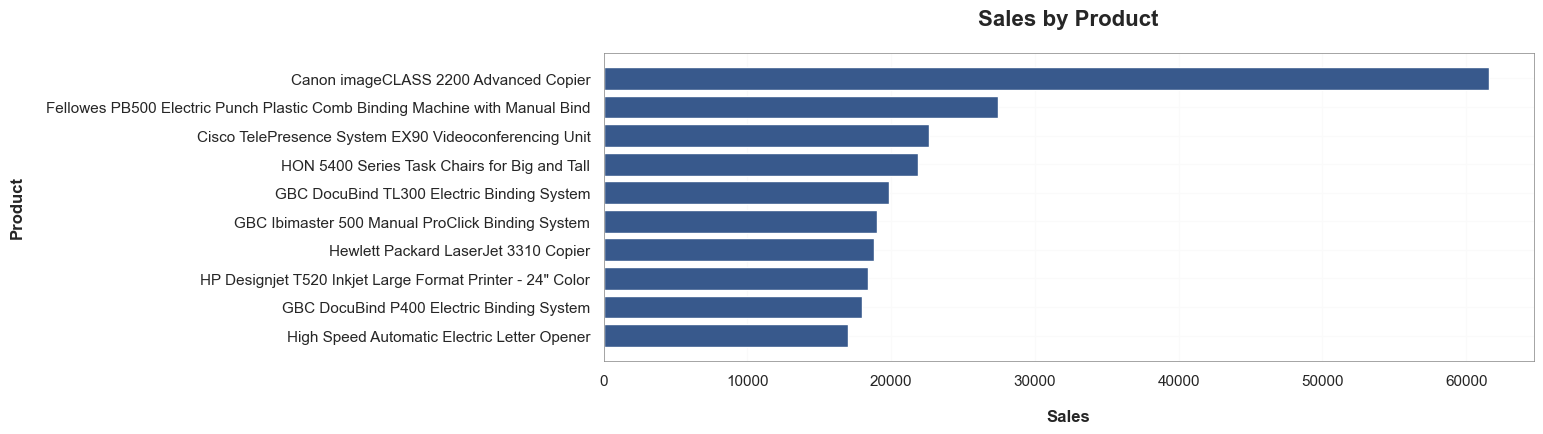

In [49]:
product_sales_profit = df_trans.groupby(['Product Name'])[['Sales', 'Profit']].sum().reset_index()
product_sales_profit.columns = ['Product Name', 'Sales', 'Profit']
product_sales_profit['% Profit'] = product_sales_profit['Profit'] / product_sales_profit['Sales']

# Sales plot
top_product_sales = product_sales_profit.sort_values(by='Sales', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,4))

ax.barh(top_product_sales['Product Name'], top_product_sales['Sales'], color = cm.viridis(70))
ax.set_title('Sales by Product', fontweight = 'bold', fontsize = 16, pad = 20)
ax.set_xlabel('Sales', fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Product', fontweight = 'bold', labelpad = 15)
ax.set_facecolor('white')
ax.invert_yaxis()
ax.grid(True, color = '#fafafa')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()


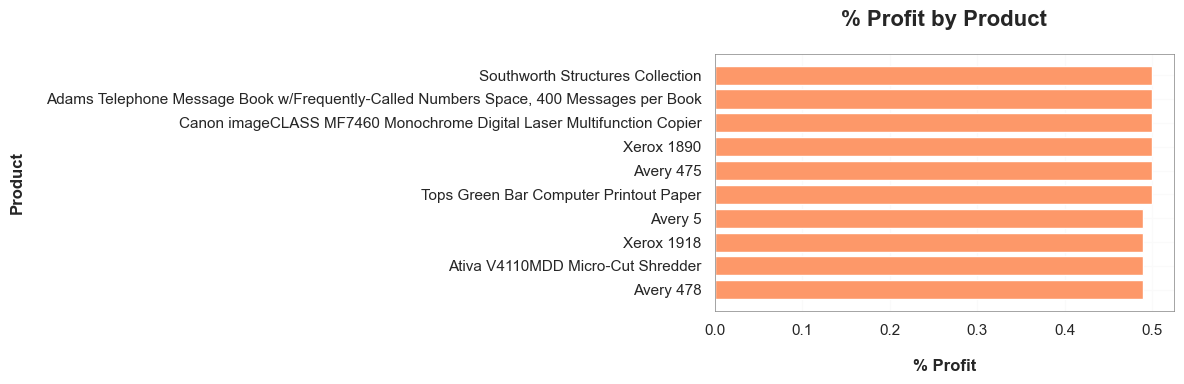

In [50]:
# Profit plot
top_product_profit = product_sales_profit.sort_values(by='% Profit', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,4))

ax.barh(top_product_profit['Product Name'], top_product_profit['% Profit'], color = cm.magma(200))
ax.set_title('% Profit by Product', fontweight = 'bold', fontsize = 16, pad = 20)
ax.set_xlabel('% Profit', fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Product', fontweight = 'bold', labelpad = 15)
ax.set_facecolor('white')
ax.invert_yaxis()
ax.grid(True, color = '#fafafa')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.tight_layout()
plt.show()

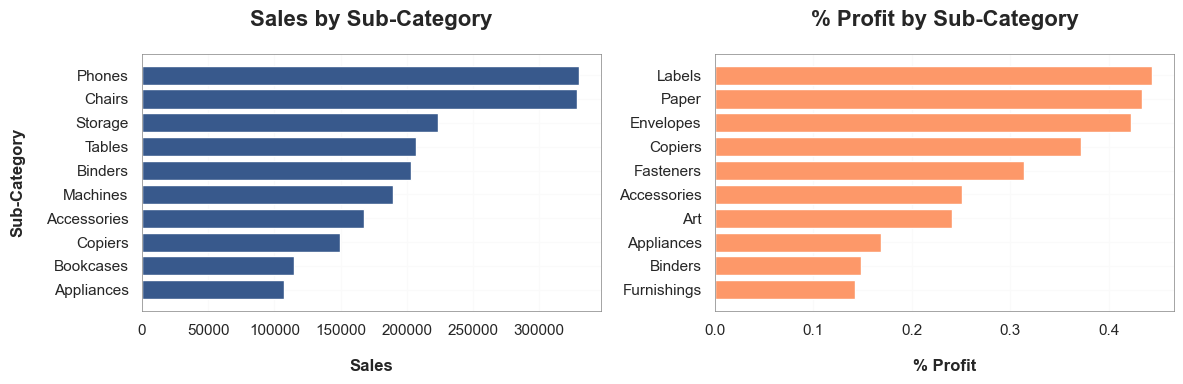

In [51]:
subcat_sales_profit = df_trans.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
subcat_sales_profit.columns = ['Sub-Category', 'Sales', 'Profit']
subcat_sales_profit['% Profit'] = subcat_sales_profit['Profit'] / subcat_sales_profit['Sales']

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Sales plot
top_subcat_sales = subcat_sales_profit.sort_values(by='Sales', ascending=False).head(10)

axs[0].barh(top_subcat_sales['Sub-Category'], top_subcat_sales['Sales'], color = cm.viridis(70))
axs[0].set_title('Sales by Sub-Category', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('Sales', fontweight = 'bold', labelpad = 15)
axs[0].set_ylabel('Sub-Category', fontweight = 'bold', labelpad = 15)
axs[0].set_facecolor('white')
axs[0].invert_yaxis()
axs[0].grid(True, color = '#fafafa')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# Profit plot
top_subcat_profit = subcat_sales_profit.sort_values(by='% Profit', ascending=False).head(10)

axs[1].barh(top_subcat_profit['Sub-Category'], top_subcat_profit['% Profit'], color = cm.magma(200))
axs[1].set_title('% Profit by Sub-Category', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('% Profit', fontweight = 'bold', labelpad = 15)
axs[1].set_facecolor('white')
axs[1].invert_yaxis()
axs[1].grid(True, color = '#fafafa')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.tight_layout()
plt.show()

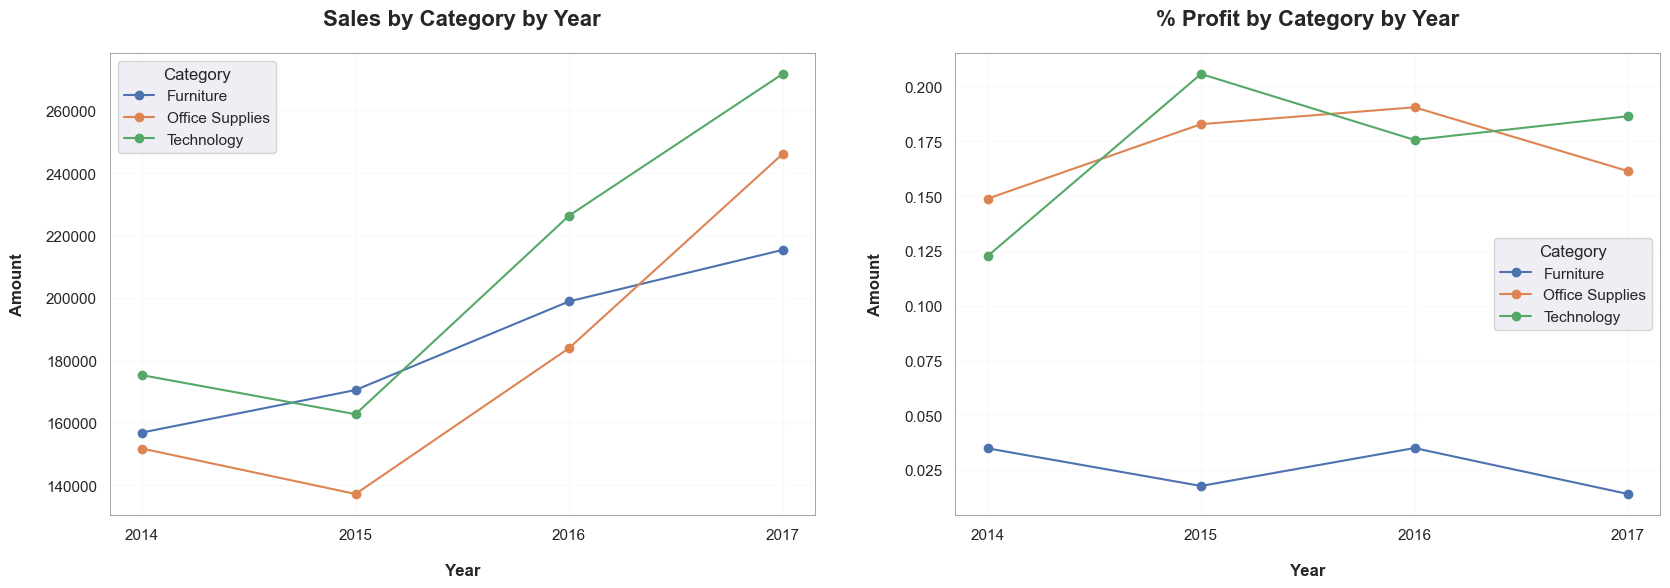

In [52]:
df_trans_cat_year = df_trans.groupby(['Order Year', 'Category'])[['Sales', 'Profit']].sum().reset_index()
df_trans_cat_year['% Profit'] = df_trans_cat_year['Profit'] / df_trans_cat_year['Sales']
df_trans_cat_year['Order Year'] = df_trans_cat_year['Order Year'].astype(str)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Sales chart
for category in df_trans_cat_year['Category'].unique():
    df_cat_year = df_trans_cat_year[df_trans_cat_year['Category'] == category]
    axs[0].plot(df_cat_year['Order Year'], df_cat_year['Sales'], label = category, marker = 'o')

axs[0].set_title('Sales by Category by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[0].set_xlabel('Year', fontweight = 'bold', labelpad = 15)
axs[0].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[0].legend(title = 'Category')
axs[0].grid(True, color = '#fafafa')
axs[0].set_facecolor('white')

for spine in axs[0].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

# % Profit chart
for category in df_trans_cat_year['Category'].unique():
    df_cat_year = df_trans_cat_year[df_trans_cat_year['Category'] == category]
    axs[1].plot(df_cat_year['Order Year'], df_cat_year['% Profit'], label = category, marker = 'o')

axs[1].set_title('% Profit by Category by Year', fontweight = 'bold', fontsize = 16, pad = 20)
axs[1].set_xlabel('Year', fontweight = 'bold', labelpad = 15)
axs[1].set_ylabel('Amount', fontweight = 'bold', labelpad = 15)
axs[1].legend(title = 'Category')
axs[1].grid(True, color = '#fafafa')
axs[1].set_facecolor('white')

for spine in axs[1].spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

In [53]:
df_trans_cat_seg = df_trans.groupby(['Category', 'Segment'])['Sales'].sum().reset_index()
df_trans_cat_seg

,Category,Segment,Sales
0,Furniture,Consumer,391049.3120
1,Furniture,Corporate,229019.7858
2,Furniture,Home Office,121649.3255
3,Office Supplies,Consumer,363952.1360
4,Office Supplies,Corporate,230676.4620
5,Office Supplies,Home Office,124418.4340
6,Technology,Consumer,406399.8970
7,Technology,Corporate,246450.1190
8,Technology,Home Office,183304.0170


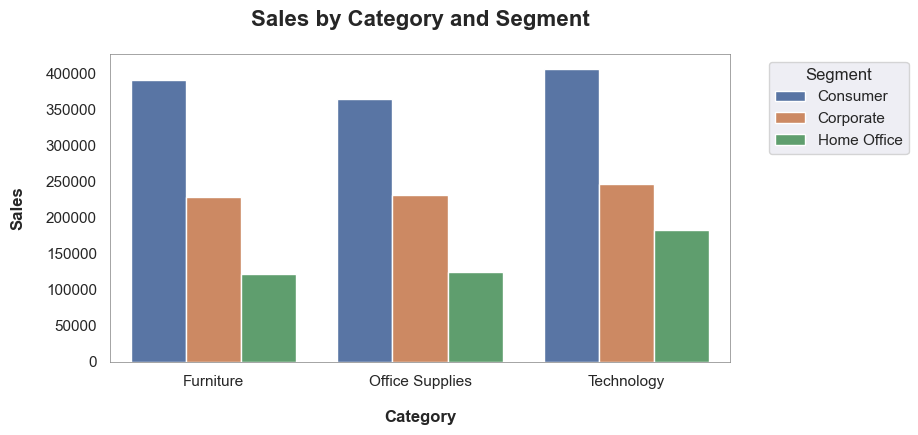

In [54]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_facecolor('white')

sns.barplot(x='Category', y='Sales', hue='Segment', data=df_trans_cat_seg)
ax.set_title('Sales by Category and Segment', fontweight = 'bold', fontsize = 16, pad = 20)
ax.set_xlabel('Category', fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Sales', fontweight = 'bold', labelpad = 15)
ax.legend(title='Segment',  bbox_to_anchor=(1.05, 1), loc='upper left')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

## 6. Basket Analysis

In [55]:
df_unique_subcat_order = df_trans[['Order ID', 'Sub-Category']].drop_duplicates()
crosstab_subcat = pd.crosstab(df_unique_subcat_order['Order ID'], df_unique_subcat_order['Sub-Category'])

In [56]:
!pip install mlxtend

In [57]:
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
frequent_subcatsets = apriori(crosstab_subcat, min_support = 0.001, use_colnames = True)

rules_subcat = association_rules(frequent_subcatsets, metric = 'lift')

C:\Users\Topica\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [59]:
rules_subcat.sort_values(['support', 'confidence', 'lift'], axis = 0, ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
86,(Paper),(Binders),0.237772,0.262727,0.054901,0.230898,0.878853,-0.007568,0.958616,-0.153151
87,(Binders),(Paper),0.262727,0.237772,0.054901,0.208967,0.878853,-0.007568,0.963585,-0.157518
91,(Storage),(Binders),0.155121,0.262727,0.039728,0.256113,0.974826,-0.001026,0.991109,-0.029659
89,(Phones),(Binders),0.162507,0.262727,0.039728,0.244472,0.930516,-0.002967,0.975838,-0.081863
90,(Binders),(Storage),0.262727,0.155121,0.039728,0.151216,0.974826,-0.001026,0.995399,-0.033841


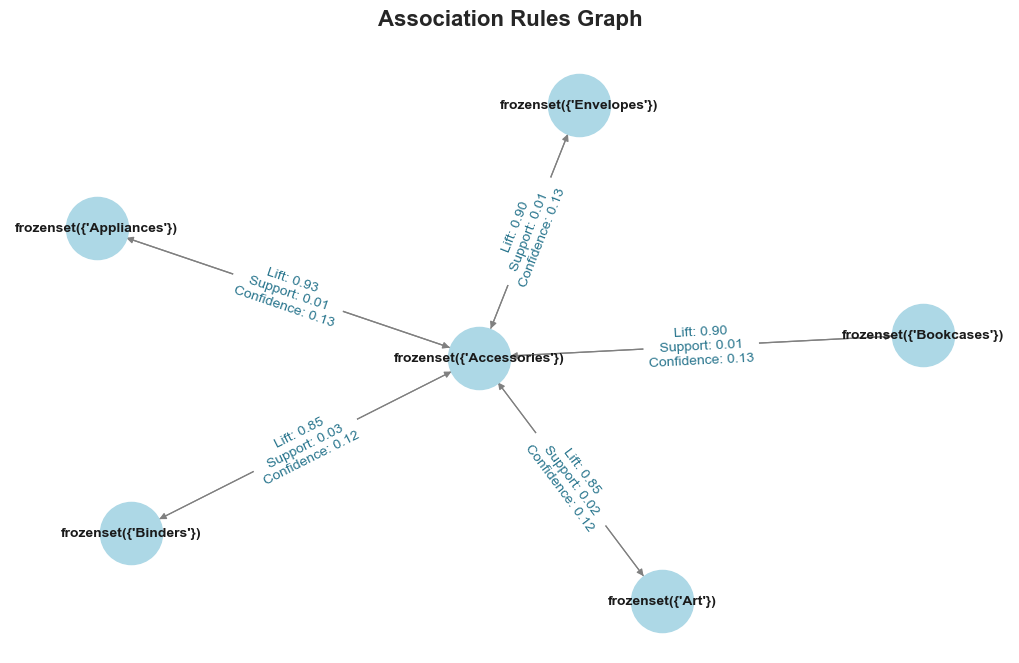

In [105]:
import networkx as nx

rules_subcat = pd.DataFrame(rules_subcat.sort_values(['support', 'confidence', 'lift'], axis = 0, ascending = False).head(10))

# Create a graph
G = nx.DiGraph()

# Add edges with attributes
for _, row in rules_subcat.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'], support=row['support'], confidence=row['confidence'])

# Position the nodes using a layout
pos = nx.spring_layout(G, seed=33)  # You can use other layouts like 'circular', 'kamada_kaway', etc.

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color= 'lightblue', font_size=10, font_weight='bold', edge_color='grey', linewidths=1, width=[d['weight'] for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Lift: {d['weight']:.2f}\nSupport: {d['support']:.2f}\nConfidence: {d['confidence']:.2f}" for u, v, d in G.edges(data=True)}, font_color=cm.viridis(100))
plt.title('Association Rules Graph', fontweight = 'bold', fontsize = 16, pad = 20)
plt.show()

In [61]:
df_unique_product_order = df_trans[(df_trans['Order Year'] == 2017) & (df_trans['Segment'] == 'Consumer')][['Order ID', 'Product Name']].drop_duplicates()
crosstab_product = pd.crosstab(df_unique_product_order['Order ID'], df_unique_product_order['Product Name'])

In [62]:
frequent_productsets = apriori(crosstab_product, min_support = 0.001, use_colnames = True)

rules_product = association_rules(frequent_productsets, metric = 'lift')

C:\Users\Topica\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [63]:
rules_product.sort_values(['support', 'confidence', 'lift'], axis = 0, ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Carina Double Wide Media Storage Towers in Na...,"(1.7 Cubic Foot Compact ""Cube"" Office Refriger...",0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
27,"(1.7 Cubic Foot Compact ""Cube"" Office Refriger...",(Carina Double Wide Media Storage Towers in Na...,0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
28,"(1.7 Cubic Foot Compact ""Cube"" Office Refriger...","(Executive Impressions 12"" Wall Clock)",0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
29,"(Executive Impressions 12"" Wall Clock)","(1.7 Cubic Foot Compact ""Cube"" Office Refriger...",0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
40,(24-Hour Round Wall Clock),(SAFCO Arco Folding Chair),0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
41,(SAFCO Arco Folding Chair),(24-Hour Round Wall Clock),0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
42,(24-Hour Round Wall Clock),(SAFCO Optional Arm Kit for Workspace Cribbage...,0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
43,(SAFCO Optional Arm Kit for Workspace Cribbage...,(24-Hour Round Wall Clock),0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
62,"(3D Systems Cube Printer, 2nd Generation, White)",(Xerox 209),0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0
63,(Xerox 209),"(3D Systems Cube Printer, 2nd Generation, White)",0.001142,0.001142,0.001142,1.0,876.0,0.00114,inf,1.0


## 7. Customer Clustering (K-Means and PCA)

In [64]:
df_trans.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Day,Order MonthYear,Order Month,Order Year,Order DOW
0,1,CA-2016-152156,2016-11-08,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,8,16-11,11,2016,Sunday
1,2,CA-2016-152156,2016-11-08,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,8,16-11,11,2016,Sunday
2,3,CA-2016-138688,2016-06-12,2016-06-12,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,12,16-06,6,2016,Friday
3,4,US-2015-108966,2015-10-11,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,11,15-10,10,2015,Friday
4,5,US-2015-108966,2015-10-11,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11,15-10,10,2015,Friday


In [65]:
df_trans['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [66]:
segment_mapping = {'Consumer':0, 'Home Office':1, 'Corporate':2}

df_trans['Segment Num'] = df_trans['Segment'].map(segment_mapping)

df_trans['Segment Num']

0       0
1       0
2       2
3       0
4       0
       ..
9988    0
9989    0
9990    0
9991    0
9992    0
Name: Segment Num, Length: 9993, dtype: int64

In [67]:
df_customer = df_trans.groupby(['Customer ID']).agg(
    Segment = ('Segment Num', 'max'),
    Sales = ('Sales', 'sum'),
    Quantity = ('Quantity', 'sum'),
    Discount_Amount = ('Discount', 'sum'),
    Discounted_Items = ('Discount', lambda x: (x > 0).sum()),
    Profit = ('Profit', 'sum')
).reset_index()

df_customer

,Customer ID,Segment,Sales,Quantity,Discount_Amount,Discounted_Items,Profit
0,AA-10315,0,5563.560,30,1.00,5,-362.8825
1,AA-10375,0,1056.390,41,1.20,6,277.3824
2,AA-10480,0,1790.512,36,0.20,1,435.8274
3,AA-10645,0,5086.935,64,1.15,4,857.8033
4,AB-10015,0,886.156,13,0.40,2,129.3465
...,...,...,...,...,...,...,...
788,XP-21865,0,2374.658,100,1.30,7,621.2300
789,YC-21895,2,5454.350,31,0.60,3,1305.6290
790,YS-21880,2,6720.444,58,0.60,3,1778.2923
791,ZC-21910,0,8025.707,105,7.90,20,-1032.1490


In [68]:
df_customer_ = df_customer.drop(columns=['Customer ID'])

In [69]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [70]:
scaler = StandardScaler()
df_customer_std = scaler.fit_transform(df_customer_)

C:\Users\Topica\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Topica\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Topica\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\Topica\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [71]:
pca = PCA()

In [72]:
pca.fit(df_customer_std)

PCA()

In [73]:
pca.explained_variance_ratio_

array([0.47357102, 0.23746474, 0.16602127, 0.06376346, 0.04800548,
       0.01117403])

Text(0, 0.5, 'Cumulative Explained Variance')

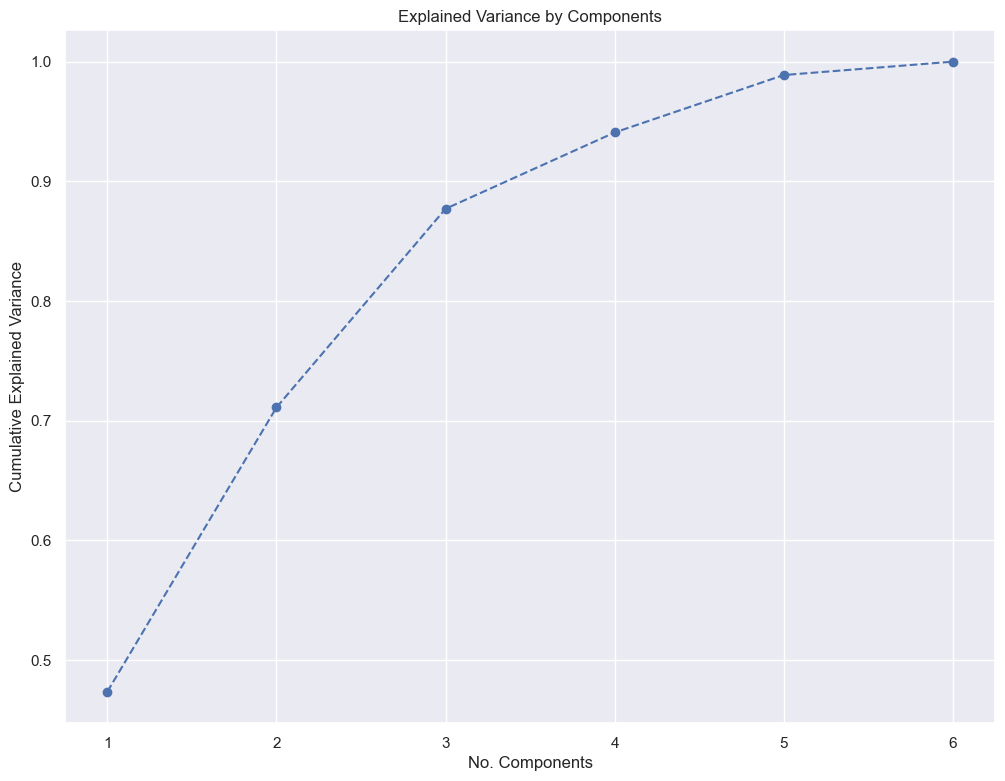

In [74]:
plt.figure(figsize=(12,9))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('No. Components')
plt.ylabel('Cumulative Explained Variance')

In [75]:
pca = PCA(n_components = 3)

In [76]:
pca.fit(df_customer_std)

PCA(n_components=3)

In [77]:
pca.components_

array([[ 0.01214871,  0.38403774,  0.52777156,  0.51488964,  0.54169553,
         0.12360914],
       [ 0.09270023,  0.50203518,  0.05496104, -0.33565886, -0.26246431,
         0.74484377],
       [-0.9955614 ,  0.05648355,  0.00282678, -0.02333086, -0.01428516,
         0.07007661]])

In [78]:
df_pca_component = pd.DataFrame(data = pca.components_, 
                                columns = df_customer_.columns.values,
                                index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_component

,Segment,Sales,Quantity,Discount_Amount,Discounted_Items,Profit
Component 1,0.012149,0.384038,0.527772,0.514890,0.541696,0.123609
Component 2,0.092700,0.502035,0.054961,-0.335659,-0.262464,0.744844
Component 3,-0.995561,0.056484,0.002827,-0.023331,-0.014285,0.070077


([<matplotlib.axis.YTick at 0x23e00dde350>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

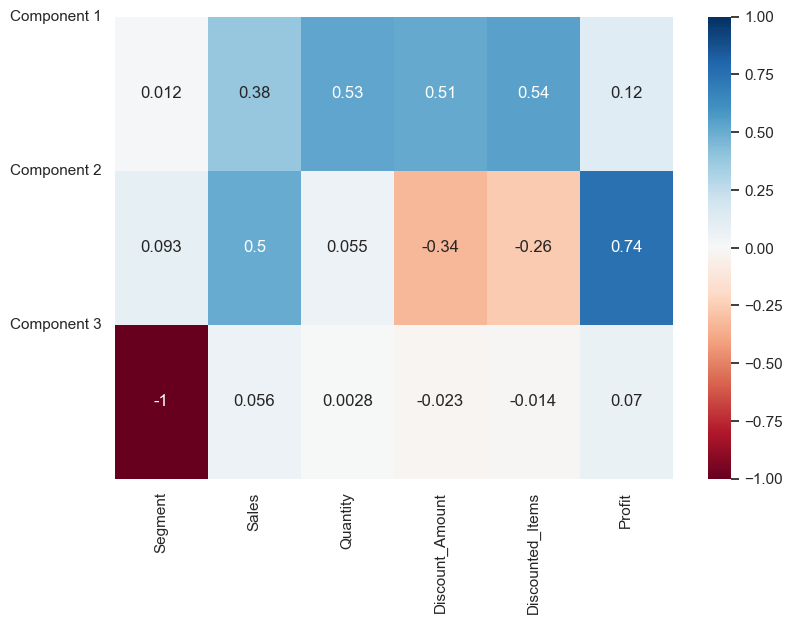

In [79]:
plt.figure(figsize=(9,6))
sns.heatmap(df_pca_component, vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
plt.yticks([0,1,2], ['Component 1', 'Component 2', 'Component 3'], rotation = 0)

([<matplotlib.axis.YTick at 0x23e3c283a90>,
 [Text(0, 0, 'Seeking Discount'),
  Text(0, 1, 'Seeking Value'),
  Text(0, 2, 'Moderate Consuming')])

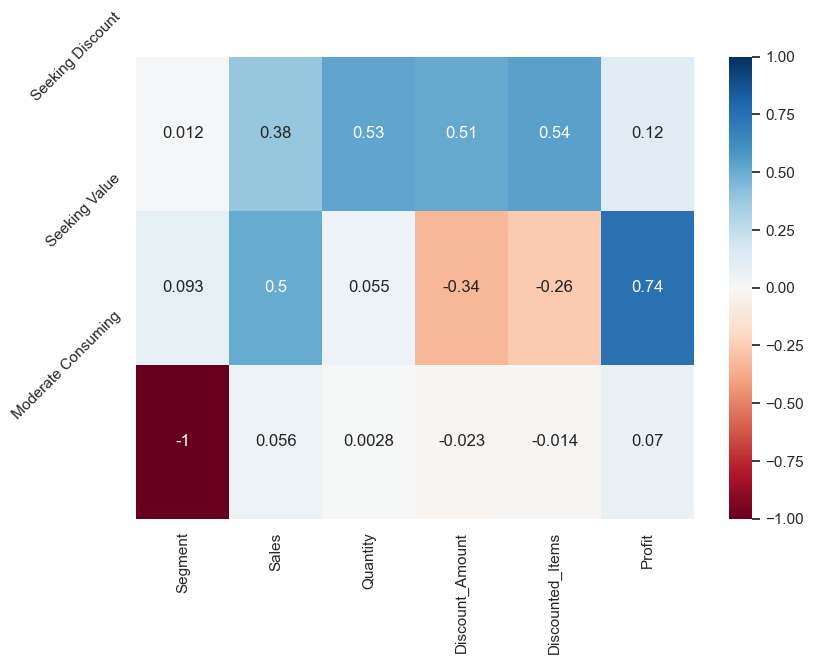

In [80]:
plt.figure(figsize=(9,6))
sns.heatmap(df_pca_component, vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
plt.yticks([0,1,2], ['Seeking Discount', 'Seeking Value', 'Moderate Consuming'], rotation = 45)

In [81]:
pca.transform(df_customer_std)

array([[-0.65296306,  0.1116551 ,  0.90931863],
       [-0.78625588, -0.30243853,  0.85712072],
       [-1.77955641,  0.51208114,  0.91844477],
       ...,
       [ 0.02888009,  2.61246636, -1.1565959 ],
       [ 5.67505142, -2.39318142,  0.75304996],
       [-1.12078213, -0.15163842,  0.87002608]])

In [82]:
scores_pca = pca.transform(df_customer_std)

In [83]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=999)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

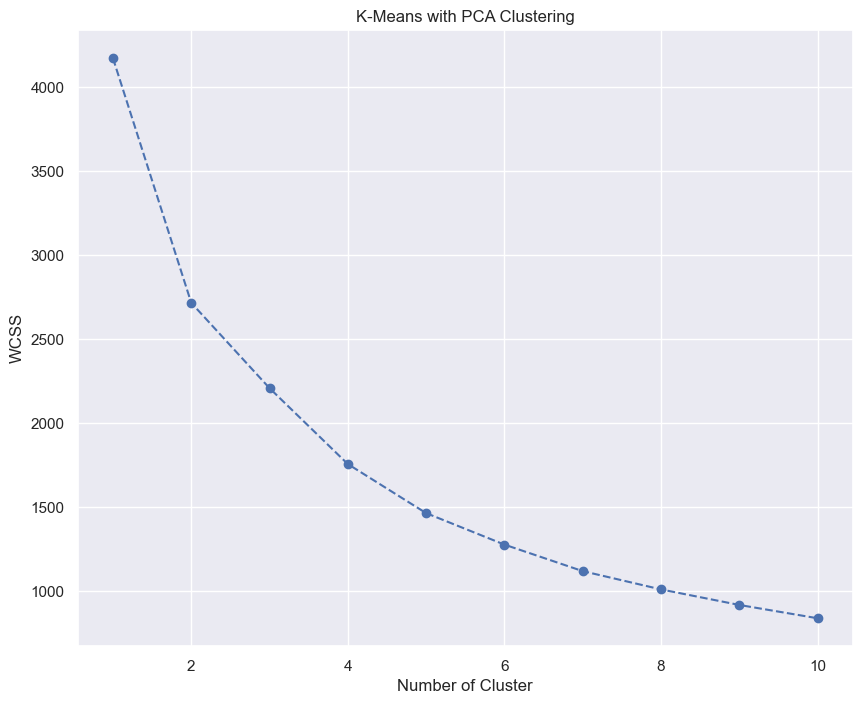

In [84]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

In [85]:
silhouette_scores = []

# Try different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scores_pca)
    silhouette_avg = silhouette_score(scores_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [86]:
scores_pca

array([[-0.65296306,  0.1116551 ,  0.90931863],
       [-0.78625588, -0.30243853,  0.85712072],
       [-1.77955641,  0.51208114,  0.91844477],
       ...,
       [ 0.02888009,  2.61246636, -1.1565959 ],
       [ 5.67505142, -2.39318142,  0.75304996],
       [-1.12078213, -0.15163842,  0.87002608]])

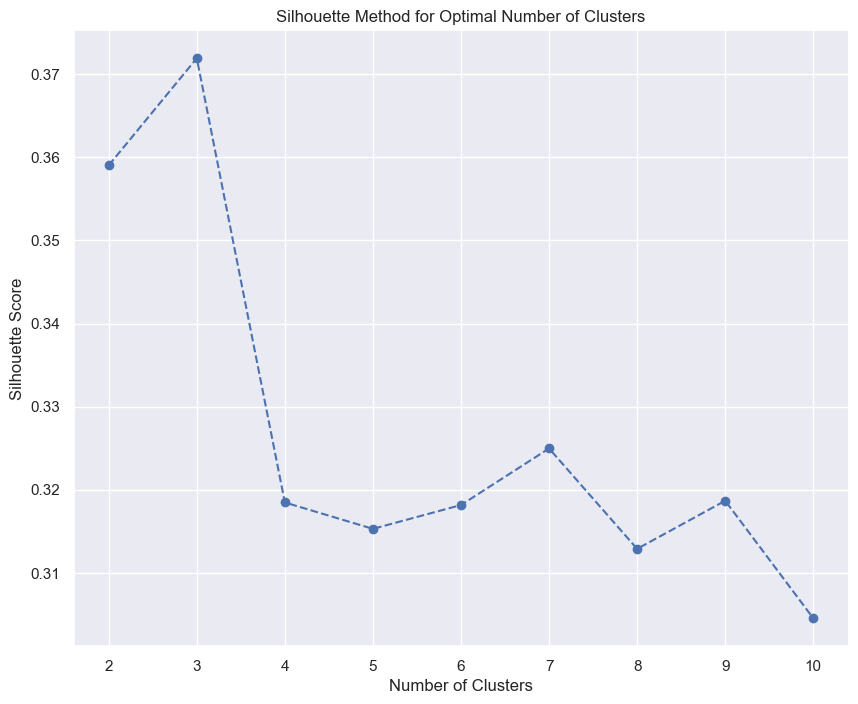

In [87]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

In [88]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 999)
kmeans_pca.fit(scores_pca)

C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Topica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=999)

In [89]:
df_customer_pca_kmeans = pd.concat([df_customer_.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_customer_pca_kmeans.columns.values[-3:] = ['Seeking Discount and Quantity', 'Seeking Value', 'Morderate Consuming']
df_customer_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_customer_pca_kmeans['Segment K-means PCA'] = df_customer_pca_kmeans['Segment K-means PCA'].replace({0: 'Steady Shopper', 1: 'High-Demanded Shopper', 2: 'Discount-Driven Shopper'})

In [90]:
df_customer_pca_kmeans

,Segment,Sales,Quantity,Discount_Amount,Discounted_Items,Profit,Seeking Discount and Quantity,Seeking Value,Morderate Consuming,Segment K-means PCA
0,0,5563.560,30,1.00,5,-362.8825,-0.652963,0.111655,0.909319,Steady Shopper
1,0,1056.390,41,1.20,6,277.3824,-0.786256,-0.302439,0.857121,Steady Shopper
2,0,1790.512,36,0.20,1,435.8274,-1.779556,0.512081,0.918445,Steady Shopper
3,0,5086.935,64,1.15,4,857.8033,0.092984,1.140936,0.999631,Steady Shopper
4,0,886.156,13,0.40,2,129.3465,-2.239900,-0.077765,0.865611,Steady Shopper
...,...,...,...,...,...,...,...,...,...,...
788,0,2374.658,100,1.30,7,621.2300,0.875291,0.279765,0.914058,Discount-Driven Shopper
789,2,5454.350,31,0.60,3,1305.6290,-0.795625,1.916768,-1.223958,Steady Shopper
790,2,6720.444,58,0.60,3,1778.2923,0.028880,2.612466,-1.156596,High-Demanded Shopper
791,0,8025.707,105,7.90,20,-1032.1490,5.675051,-2.393181,0.753050,Discount-Driven Shopper


In [91]:
df_customer_pca_kmeans_analysis = df_customer_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_customer_pca_kmeans_analysis

,Segment,Sales,Quantity,Discount_Amount,Discounted_Items,Profit,Seeking Discount and Quantity,Seeking Value,Morderate Consuming
Segment K-means PCA,,,,,,,,,
Discount-Driven Shopper,0.738739,3760.783973,71.603604,3.668243,11.486486,170.882792,1.868658,-0.660170,0.010427
High-Demanded Shopper,1.028571,8114.808206,66.085714,1.745571,6.671429,2080.312943,1.328617,2.542009,-0.028347
Steady Shopper,0.766467,1784.408926,34.628743,1.246008,4.347305,205.291806,-1.013663,-0.062641,-0.000660


In [92]:
df_customer_pca_kmeans_analysis['No. Observations'] = df_customer_pca_kmeans[['Segment K-means PCA','Segment']].groupby(['Segment K-means PCA']).count()
df_customer_pca_kmeans_analysis['Prop. Observations'] = df_customer_pca_kmeans_analysis['No. Observations'] / df_customer_pca_kmeans_analysis['No. Observations'].sum()


In [108]:
df_customer_pca_kmeans_analysis

,Segment,Sales,Quantity,Discount_Amount,Discounted_Items,Profit,Seeking Discount and Quantity,Seeking Value,Morderate Consuming,No. Observations,Prop. Observations
Segment K-means PCA,,,,,,,,,,,
Discount-Driven Shopper,0.738739,3760.783973,71.603604,3.668243,11.486486,170.882792,1.868658,-0.660170,0.010427,222,0.279950
High-Demanded Shopper,1.028571,8114.808206,66.085714,1.745571,6.671429,2080.312943,1.328617,2.542009,-0.028347,70,0.088272
Steady Shopper,0.766467,1784.408926,34.628743,1.246008,4.347305,205.291806,-1.013663,-0.062641,-0.000660,501,0.631778


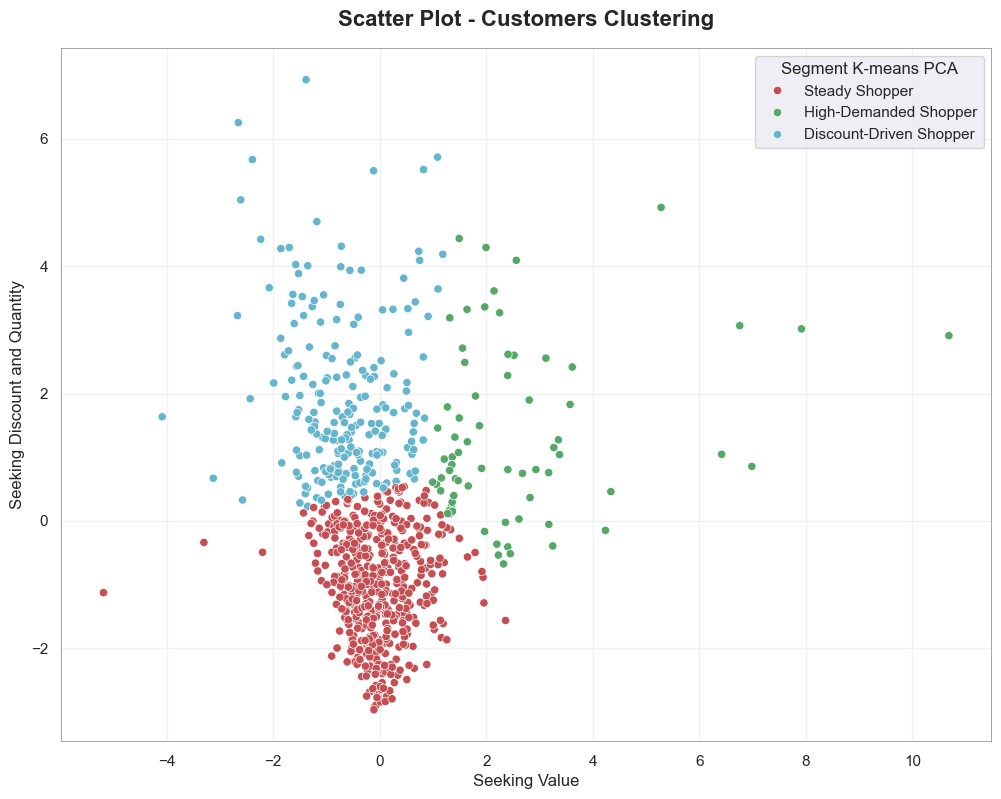

In [93]:
x_axis = df_customer_pca_kmeans['Seeking Value']
y_axis = df_customer_pca_kmeans['Seeking Discount and Quantity']
fig, ax = plt.subplots(figsize = (12,9))
ax.set_facecolor('white')

sns.scatterplot(x = x_axis, y = y_axis, hue =  df_customer_pca_kmeans['Segment K-means PCA'], palette = ['r', 'g', 'c'])
ax.set_title('Scatter Plot - Customers Clustering', fontsize = 16, fontweight = 'bold', pad = 16)
ax.grid(True, color = '#f1f1f1')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

In [94]:
df_customer_final = pd.concat([df_customer.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_customer_final.columns.values[-3:] = ['Seeking Discount and Quantity', 'Seeking Value', 'Morderate Consuming']
df_customer_final['Segment K-means PCA'] = kmeans_pca.labels_
df_customer_final

,Customer ID,Segment,Sales,Quantity,Discount_Amount,Discounted_Items,Profit,Seeking Discount and Quantity,Seeking Value,Morderate Consuming,Segment K-means PCA
0,AA-10315,0,5563.560,30,1.00,5,-362.8825,-0.652963,0.111655,0.909319,0
1,AA-10375,0,1056.390,41,1.20,6,277.3824,-0.786256,-0.302439,0.857121,0
2,AA-10480,0,1790.512,36,0.20,1,435.8274,-1.779556,0.512081,0.918445,0
3,AA-10645,0,5086.935,64,1.15,4,857.8033,0.092984,1.140936,0.999631,0
4,AB-10015,0,886.156,13,0.40,2,129.3465,-2.239900,-0.077765,0.865611,0
...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,0,2374.658,100,1.30,7,621.2300,0.875291,0.279765,0.914058,2
789,YC-21895,2,5454.350,31,0.60,3,1305.6290,-0.795625,1.916768,-1.223958,0
790,YS-21880,2,6720.444,58,0.60,3,1778.2923,0.028880,2.612466,-1.156596,1
791,ZC-21910,0,8025.707,105,7.90,20,-1032.1490,5.675051,-2.393181,0.753050,2


In [95]:
dim_customer_demo = df_trans.groupby('Customer ID')[['Segment', 'City', 'State']].max().reset_index()
dim_customer_demo.head()

,Customer ID,Segment,City,State
0,AA-10315,Consumer,San Francisco,Texas
1,AA-10375,Consumer,Salem,Tennessee
2,AA-10480,Consumer,Springfield,North Carolina
3,AA-10645,Consumer,San Francisco,Pennsylvania
4,AB-10015,Consumer,Seattle,Washington


In [96]:
df_customer_final = pd.merge(df_customer_final, dim_customer_demo, on = 'Customer ID', how = 'left')
df_customer_final = df_customer_final.rename(columns={'Segment_y': 'Segment'})
df_customer_final

,Customer ID,Segment_x,Sales,Quantity,Discount_Amount,Discounted_Items,Profit,Seeking Discount and Quantity,Seeking Value,Morderate Consuming,Segment K-means PCA,Segment,City,State
0,AA-10315,0,5563.560,30,1.00,5,-362.8825,-0.652963,0.111655,0.909319,0,Consumer,San Francisco,Texas
1,AA-10375,0,1056.390,41,1.20,6,277.3824,-0.786256,-0.302439,0.857121,0,Consumer,Salem,Tennessee
2,AA-10480,0,1790.512,36,0.20,1,435.8274,-1.779556,0.512081,0.918445,0,Consumer,Springfield,North Carolina
3,AA-10645,0,5086.935,64,1.15,4,857.8033,0.092984,1.140936,0.999631,0,Consumer,San Francisco,Pennsylvania
4,AB-10015,0,886.156,13,0.40,2,129.3465,-2.239900,-0.077765,0.865611,0,Consumer,Seattle,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,0,2374.658,100,1.30,7,621.2300,0.875291,0.279765,0.914058,2,Consumer,Westland,Texas
789,YC-21895,2,5454.350,31,0.60,3,1305.6290,-0.795625,1.916768,-1.223958,0,Corporate,San Francisco,Texas
790,YS-21880,2,6720.444,58,0.60,3,1778.2923,0.028880,2.612466,-1.156596,1,Corporate,Seattle,Washington
791,ZC-21910,0,8025.707,105,7.90,20,-1032.1490,5.675051,-2.393181,0.753050,2,Consumer,Salem,Washington


In [97]:
cluster_mapping = {0: 'Steady Shopper', 1: 'High-Demanded Shopper', 2: 'Discount-Driven Shopper'}

df_customer_final['Segment K-means PCA'] = df_customer_final['Segment K-means PCA'].map(cluster_mapping)
df_customer_final

,Customer ID,Segment_x,Sales,Quantity,Discount_Amount,Discounted_Items,Profit,Seeking Discount and Quantity,Seeking Value,Morderate Consuming,Segment K-means PCA,Segment,City,State
0,AA-10315,0,5563.560,30,1.00,5,-362.8825,-0.652963,0.111655,0.909319,Steady Shopper,Consumer,San Francisco,Texas
1,AA-10375,0,1056.390,41,1.20,6,277.3824,-0.786256,-0.302439,0.857121,Steady Shopper,Consumer,Salem,Tennessee
2,AA-10480,0,1790.512,36,0.20,1,435.8274,-1.779556,0.512081,0.918445,Steady Shopper,Consumer,Springfield,North Carolina
3,AA-10645,0,5086.935,64,1.15,4,857.8033,0.092984,1.140936,0.999631,Steady Shopper,Consumer,San Francisco,Pennsylvania
4,AB-10015,0,886.156,13,0.40,2,129.3465,-2.239900,-0.077765,0.865611,Steady Shopper,Consumer,Seattle,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,XP-21865,0,2374.658,100,1.30,7,621.2300,0.875291,0.279765,0.914058,Discount-Driven Shopper,Consumer,Westland,Texas
789,YC-21895,2,5454.350,31,0.60,3,1305.6290,-0.795625,1.916768,-1.223958,Steady Shopper,Corporate,San Francisco,Texas
790,YS-21880,2,6720.444,58,0.60,3,1778.2923,0.028880,2.612466,-1.156596,High-Demanded Shopper,Corporate,Seattle,Washington
791,ZC-21910,0,8025.707,105,7.90,20,-1032.1490,5.675051,-2.393181,0.753050,Discount-Driven Shopper,Consumer,Salem,Washington


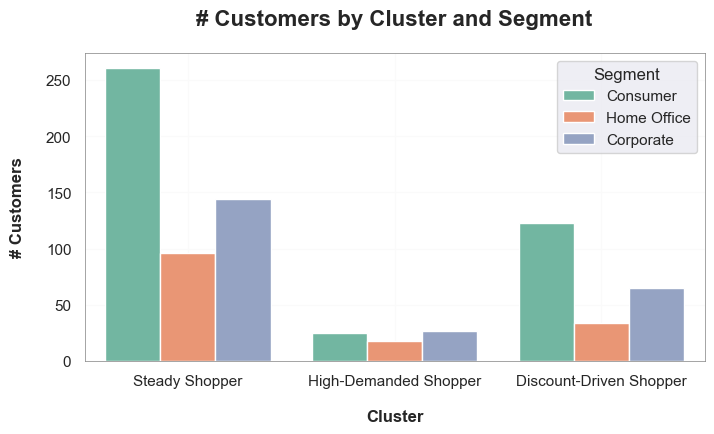

In [107]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_facecolor('white')

sns.countplot(x='Segment K-means PCA', hue='Segment', palette='Set2', data=df_customer_final)
ax.set_title('# Customers by Cluster and Segment', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Cluster', fontweight = 'bold', labelpad = 15)
ax.set_ylabel('# Customers', fontweight = 'bold', labelpad = 15)
ax.grid(True, color = '#fafafa')
plt.legend(title='Segment')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5) 

plt.show()

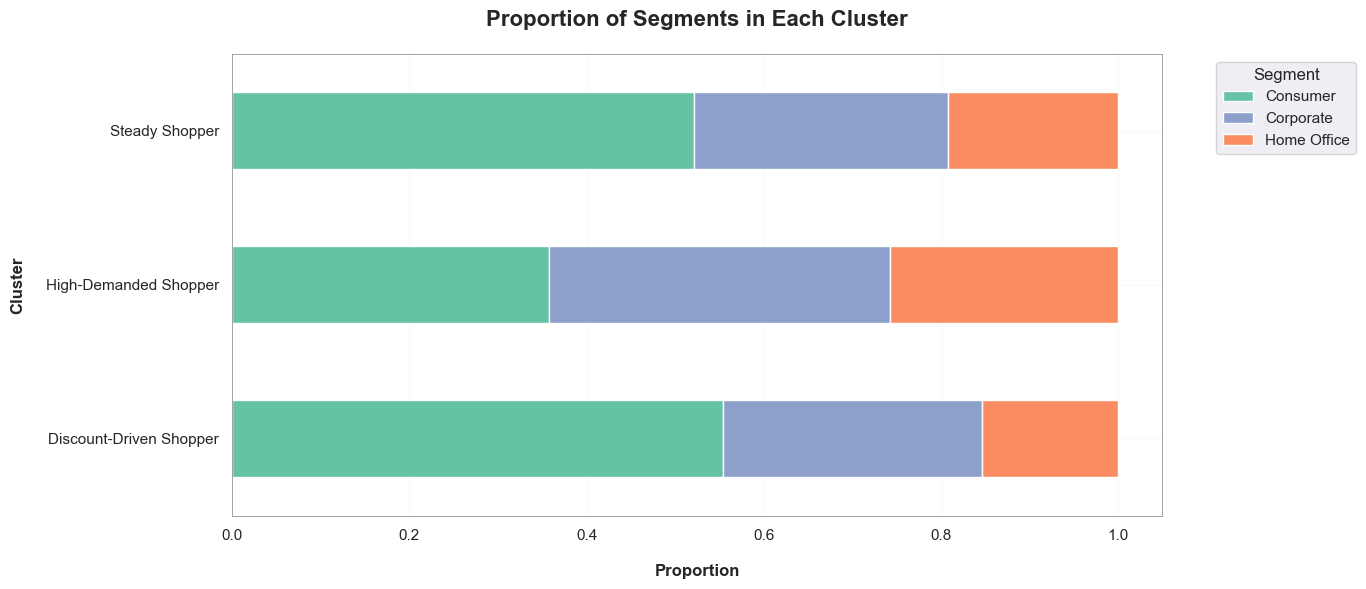

In [99]:
from matplotlib.colors import ListedColormap

df_proportion = df_customer_final.groupby(['Segment K-means PCA', 'Segment']).size().unstack().fillna(0)
df_proportion = df_proportion.div(df_proportion.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor('white')

set2_colors = sns.color_palette('Set2')
selected_colors = [set2_colors[0], set2_colors[2], set2_colors[1]]
custom_colormap = ListedColormap(selected_colors)

df_proportion.plot(kind = 'barh', stacked = True, colormap = custom_colormap, ax = ax)

ax.set_title('Proportion of Segments in Each Cluster', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Proportion', fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Cluster', fontweight = 'bold', labelpad = 15)
ax.legend(title = 'Segment', bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax.grid(True, color = '#fafafa')

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

plt.show()

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\2458425656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Segment K-means PCA', y = 'Sales', data = df_customer_final, palette = 'Set2', ax=ax)


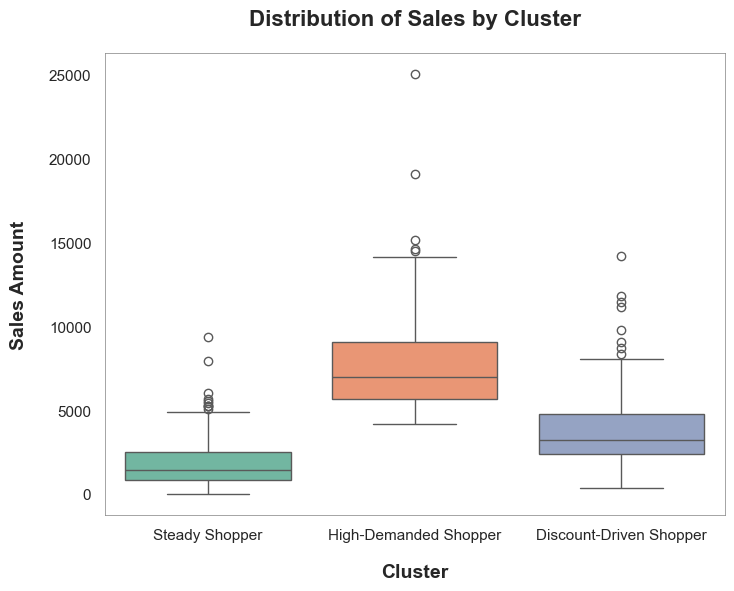

In [100]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Segment K-means PCA', y = 'Sales', data = df_customer_final, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Sales by Cluster', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Cluster', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Sales Amount', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\246056812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Segment K-means PCA', y = 'Quantity', data = df_customer_final, palette = 'Set2', ax=ax)


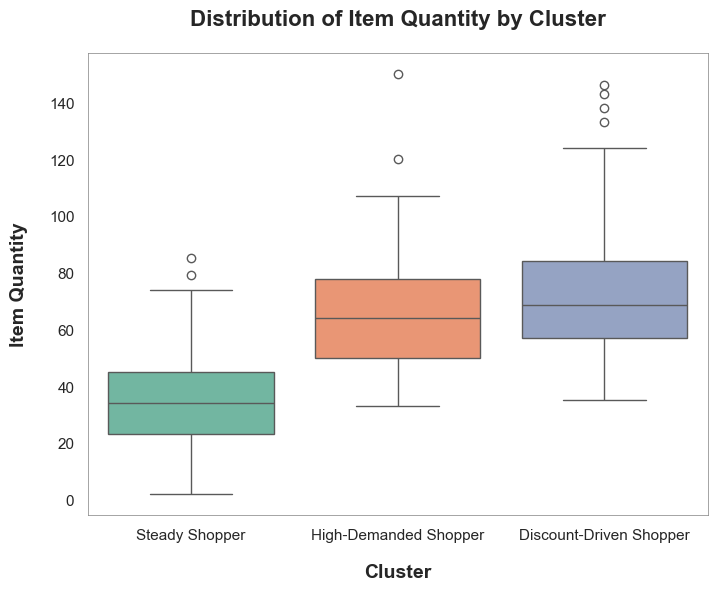

In [101]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Segment K-means PCA', y = 'Quantity', data = df_customer_final, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Item Quantity by Cluster', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Cluster', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Item Quantity', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\944746666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Segment K-means PCA', y = 'Discounted_Items', data = df_customer_final, palette = 'Set2', ax=ax)


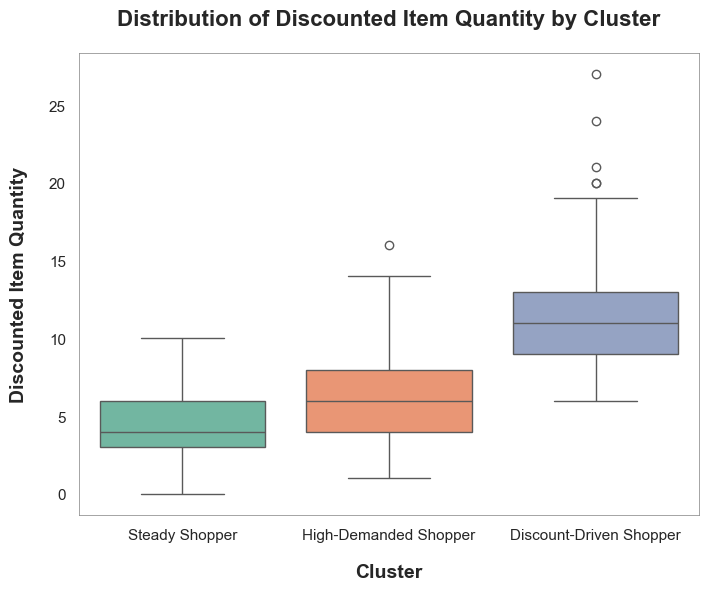

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Segment K-means PCA', y = 'Discounted_Items', data = df_customer_final, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Discounted Item Quantity by Cluster', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Cluster', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Discounted Item Quantity', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\1398289661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Segment K-means PCA', y = 'Discount_Amount', data = df_customer_final, palette = 'Set2', ax=ax)


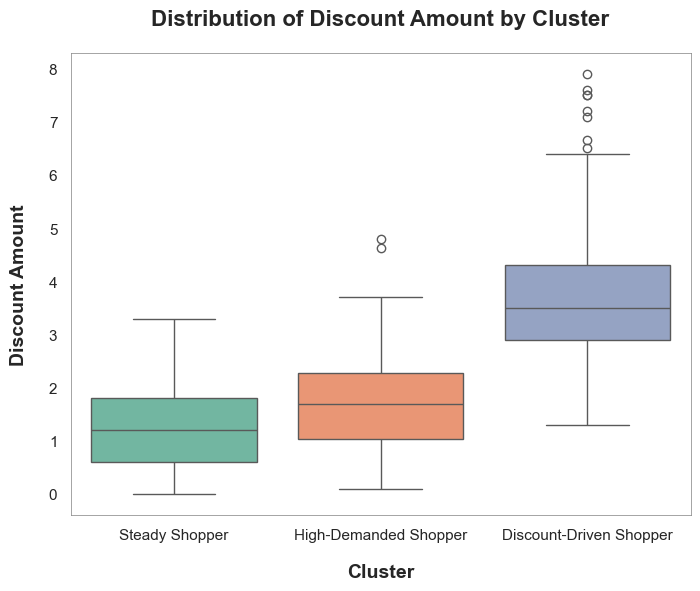

In [103]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Segment K-means PCA', y = 'Discount_Amount', data = df_customer_final, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Discount Amount by Cluster', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Cluster', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Discount Amount', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)

C:\Users\Topica\AppData\Local\Temp\ipykernel_11468\268496658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Segment K-means PCA', y = 'Profit', data = df_customer_final, palette = 'Set2', ax=ax)


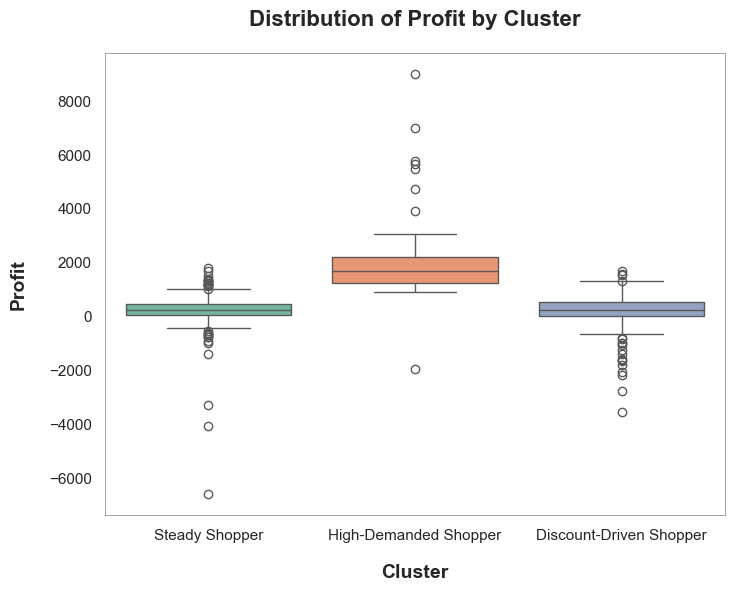

In [104]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_facecolor('white')

sns.boxplot(x = 'Segment K-means PCA', y = 'Profit', data = df_customer_final, palette = 'Set2', ax=ax)
ax.set_title('Distribution of Profit by Cluster', fontsize = 16, fontweight = 'bold', pad = 20)
ax.set_xlabel('Cluster', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.set_ylabel('Profit', fontsize = 14, fontweight = 'bold', labelpad = 15)
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

for spine in ax.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)